In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('application_data.csv')

In [3]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

In [4]:
df.shape

(307511, 122)

In [5]:
pd.set_option('display.max_columns', None)
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [6]:
# % null value in each column
pd.set_option('display.max_columns', None)
null_values_data = round((df.isnull().sum()*100/df.shape[0]),2)
null_values_data

SK_ID_CURR                     0.0
TARGET                         0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     13.5
AMT_REQ_CREDIT_BUREAU_WEEK    13.5
AMT_REQ_CREDIT_BUREAU_MON     13.5
AMT_REQ_CREDIT_BUREAU_QRT     13.5
AMT_REQ_CREDIT_BUREAU_YEAR    13.5
Length: 122, dtype: float64

In [7]:
#Getting columns whose null value percentage is > 40
null_values_data[null_values_data > 40]

OWN_CAR_AGE                     65.99
EXT_SOURCE_1                    56.38
APARTMENTS_AVG                  50.75
BASEMENTAREA_AVG                58.52
YEARS_BEGINEXPLUATATION_AVG     48.78
YEARS_BUILD_AVG                 66.50
COMMONAREA_AVG                  69.87
ELEVATORS_AVG                   53.30
ENTRANCES_AVG                   50.35
FLOORSMAX_AVG                   49.76
FLOORSMIN_AVG                   67.85
LANDAREA_AVG                    59.38
LIVINGAPARTMENTS_AVG            68.35
LIVINGAREA_AVG                  50.19
NONLIVINGAPARTMENTS_AVG         69.43
NONLIVINGAREA_AVG               55.18
APARTMENTS_MODE                 50.75
BASEMENTAREA_MODE               58.52
YEARS_BEGINEXPLUATATION_MODE    48.78
YEARS_BUILD_MODE                66.50
COMMONAREA_MODE                 69.87
ELEVATORS_MODE                  53.30
ENTRANCES_MODE                  50.35
FLOORSMAX_MODE                  49.76
FLOORSMIN_MODE                  67.85
LANDAREA_MODE                   59.38
LIVINGAPARTM

Text(0.5, 0, 'Columns')

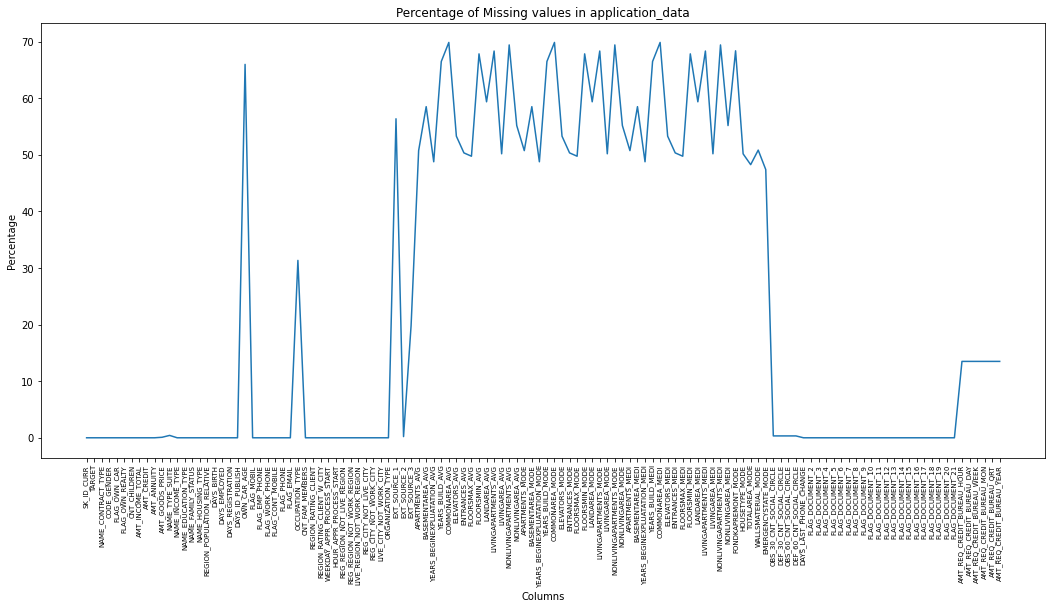

In [8]:
fig = plt.figure(figsize=(18,8))
application_missing_values_plot = sns.lineplot(data=null_values_data)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values in application_data")
plt.ylabel("Percentage")
plt.xlabel("Columns")


In [9]:
df = df.drop(['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'BASEMENTAREA_AVG',
              'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
              'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG','LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG',     
              'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',  
              'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',         
              'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI',
              'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI',                
              'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI',      
              'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'TOTALAREA_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'], axis=1)

In [10]:
# Shape of data after removing null values column 
df.shape

(307511, 73)

Text(0.5, 0, 'Columns')

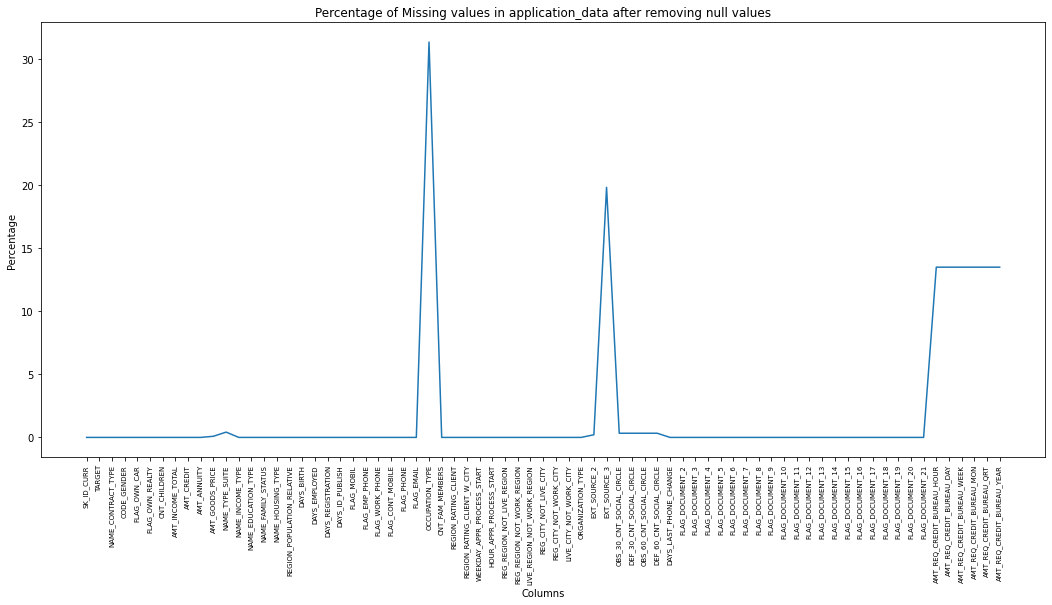

In [11]:
fig = plt.figure(figsize=(18,8))
null_values_data = round((df.isnull().sum()*100/df.shape[0]),2)
application_missing_values_plot = sns.lineplot(data=null_values_data)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values in application_data after removing null values")
plt.ylabel("Percentage")
plt.xlabel("Columns")

In [12]:
(df.isnull().sum()*100/df.shape[0]).sort_values(ascending=False)

OCCUPATION_TYPE                31.345545
EXT_SOURCE_3                   19.825307
AMT_REQ_CREDIT_BUREAU_YEAR     13.501631
AMT_REQ_CREDIT_BUREAU_QRT      13.501631
AMT_REQ_CREDIT_BUREAU_MON      13.501631
                                 ...    
REG_REGION_NOT_LIVE_REGION      0.000000
REG_REGION_NOT_WORK_REGION      0.000000
LIVE_REGION_NOT_WORK_REGION     0.000000
TARGET                          0.000000
REG_CITY_NOT_LIVE_CITY          0.000000
Length: 73, dtype: float64

In [13]:
df.OCCUPATION_TYPE.isnull().sum()

96391

In [14]:
# As OCCUPATION_TYPE has highest missing values and it is also categorical column so filling null values with new category as 'Missing'
df.OCCUPATION_TYPE.fillna(value="Missing", inplace=True)

In [15]:
df.OCCUPATION_TYPE.isnull().sum()

0

In [16]:
df.AMT_GOODS_PRICE.describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [17]:
df.AMT_GOODS_PRICE.isnull().sum()

278

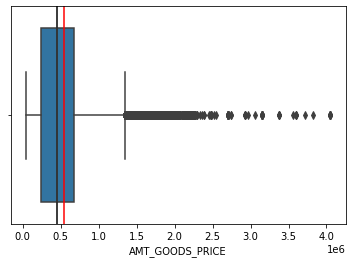

In [18]:
sns.boxplot(df.AMT_GOODS_PRICE)
plt.axvline(df.AMT_GOODS_PRICE.mean(), color='red')
plt.axvline(df.AMT_GOODS_PRICE.median(), color='black')
plt.show()

As outliers are present in AMT_GOODS_PRICE using median to fill null values

In [19]:
df.AMT_GOODS_PRICE.fillna(df.AMT_GOODS_PRICE.median(),inplace=True)

In [20]:
df.AMT_GOODS_PRICE.isnull().sum()

0

In [21]:
df.NAME_TYPE_SUITE.value_counts(normalize=True)*100

Unaccompanied      81.159562
Family             13.111205
Spouse, partner     3.713029
Children            1.066884
Other_B             0.578018
Other_A             0.282804
Group of people     0.088499
Name: NAME_TYPE_SUITE, dtype: float64

In [22]:
df.NAME_TYPE_SUITE.isnull().sum()

1292

In [23]:
df.NAME_TYPE_SUITE.describe()

count            306219
unique                7
top       Unaccompanied
freq             248526
Name: NAME_TYPE_SUITE, dtype: object

As NAME_TYPE_SUITE is categorical variable replacing null values with top category i.e Unaccompanied

In [24]:
df.NAME_TYPE_SUITE.fillna('Unaccompanied',inplace=True)

In [25]:
df.NAME_TYPE_SUITE.isnull().sum()

0

In [26]:
df.OBS_30_CNT_SOCIAL_CIRCLE.describe()

count    306490.000000
mean          1.422245
std           2.400989
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         348.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

In [27]:
df.OBS_30_CNT_SOCIAL_CIRCLE.isnull().sum()

1021

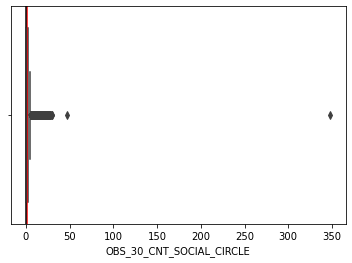

In [28]:
sns.boxplot(df.OBS_30_CNT_SOCIAL_CIRCLE)
plt.axvline(df.OBS_30_CNT_SOCIAL_CIRCLE.mean(), color='red')
plt.axvline(df.OBS_30_CNT_SOCIAL_CIRCLE.median(), color='black')
plt.show()

As OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE, AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_WEEK, AMT_REQ_CREDIT_BUREAU_MON, AMT_REQ_CREDIT_BUREAU_QRT,   AMT_REQ_CREDIT_BUREAU_YEAR  are numerical variable and outliers are present in data so filling null values with median

In [29]:
df.OBS_30_CNT_SOCIAL_CIRCLE.fillna(df.OBS_30_CNT_SOCIAL_CIRCLE.median(),inplace=True)

In [30]:
df.OBS_30_CNT_SOCIAL_CIRCLE.isnull().sum()

0

In [31]:
df.DEF_30_CNT_SOCIAL_CIRCLE.isnull().sum()

1021

In [32]:
df.DEF_30_CNT_SOCIAL_CIRCLE.describe()

count    306490.000000
mean          0.143421
std           0.446698
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          34.000000
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64

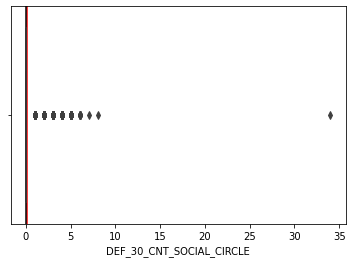

In [33]:
sns.boxplot(df.DEF_30_CNT_SOCIAL_CIRCLE)
plt.axvline(df.DEF_30_CNT_SOCIAL_CIRCLE.mean(), color='red')
plt.axvline(df.DEF_30_CNT_SOCIAL_CIRCLE.median(), color='black')
plt.show()

In [34]:
df.DEF_30_CNT_SOCIAL_CIRCLE.fillna(df.DEF_30_CNT_SOCIAL_CIRCLE.median(),inplace=True)

In [35]:
df.DEF_30_CNT_SOCIAL_CIRCLE.isnull().sum()

0

In [36]:
df.OBS_60_CNT_SOCIAL_CIRCLE.isnull().sum()

1021

In [37]:
df.OBS_60_CNT_SOCIAL_CIRCLE.describe()

count    306490.000000
mean          1.405292
std           2.379803
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         344.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64

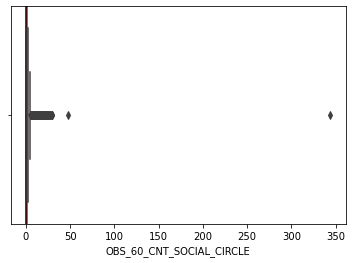

In [38]:
sns.boxplot(df.OBS_60_CNT_SOCIAL_CIRCLE)
plt.axvline(df.OBS_60_CNT_SOCIAL_CIRCLE.mean(), color='red')
plt.axvline(df.OBS_60_CNT_SOCIAL_CIRCLE.median(), color='black')
plt.show()

In [39]:
df.OBS_60_CNT_SOCIAL_CIRCLE.fillna(df.DEF_30_CNT_SOCIAL_CIRCLE.median(),inplace=True)

In [40]:
df.OBS_60_CNT_SOCIAL_CIRCLE.isnull().sum()

0

In [41]:
df.DEF_60_CNT_SOCIAL_CIRCLE.isnull().sum()

1021

In [42]:
df.DEF_60_CNT_SOCIAL_CIRCLE.describe()

count    306490.000000
mean          0.100049
std           0.362291
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          24.000000
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64

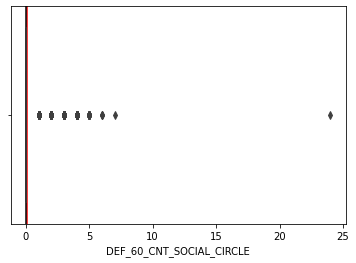

In [43]:
sns.boxplot(df.DEF_60_CNT_SOCIAL_CIRCLE)
plt.axvline(df.DEF_60_CNT_SOCIAL_CIRCLE.mean(), color='red')
plt.axvline(df.DEF_60_CNT_SOCIAL_CIRCLE.median(), color='black')
plt.show()

In [44]:
df.DEF_60_CNT_SOCIAL_CIRCLE.fillna(df.DEF_60_CNT_SOCIAL_CIRCLE.median(),inplace=True)

In [45]:
df.DEF_60_CNT_SOCIAL_CIRCLE.isnull().sum()

0

In [46]:
df.AMT_REQ_CREDIT_BUREAU_HOUR.isnull().sum()

41519

In [47]:
df.AMT_REQ_CREDIT_BUREAU_HOUR.describe()

count    265992.000000
mean          0.006402
std           0.083849
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

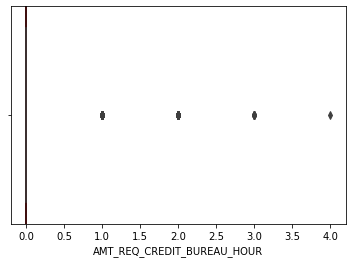

In [48]:
sns.boxplot(df.AMT_REQ_CREDIT_BUREAU_HOUR)
plt.axvline(df.AMT_REQ_CREDIT_BUREAU_HOUR.mean(), color='red')
plt.axvline(df.AMT_REQ_CREDIT_BUREAU_HOUR.median(), color='black')
plt.show()

In [49]:
df.AMT_REQ_CREDIT_BUREAU_HOUR.fillna(df.AMT_REQ_CREDIT_BUREAU_HOUR.median(),inplace=True)

In [50]:
df.AMT_REQ_CREDIT_BUREAU_HOUR.isnull().sum()

0

In [51]:
df.AMT_REQ_CREDIT_BUREAU_DAY.isnull().sum()

41519

In [52]:
df.AMT_REQ_CREDIT_BUREAU_DAY.describe()

count    265992.000000
mean          0.007000
std           0.110757
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

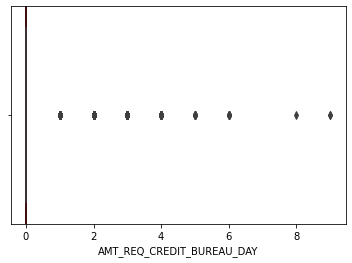

In [53]:
sns.boxplot(df.AMT_REQ_CREDIT_BUREAU_DAY)
plt.axvline(df.AMT_REQ_CREDIT_BUREAU_DAY.mean(), color='red')
plt.axvline(df.AMT_REQ_CREDIT_BUREAU_DAY.median(), color='black')
plt.show()

In [54]:
df.AMT_REQ_CREDIT_BUREAU_DAY.fillna(df.AMT_REQ_CREDIT_BUREAU_DAY.median(),inplace=True)

In [55]:
df.AMT_REQ_CREDIT_BUREAU_DAY.isnull().sum()

0

In [56]:
df.AMT_REQ_CREDIT_BUREAU_WEEK.isnull().sum()

41519

In [57]:
df.AMT_REQ_CREDIT_BUREAU_WEEK.describe()

count    265992.000000
mean          0.034362
std           0.204685
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64

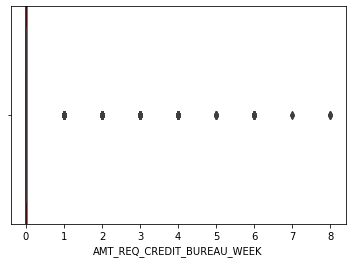

In [58]:
sns.boxplot(df.AMT_REQ_CREDIT_BUREAU_WEEK)
plt.axvline(df.AMT_REQ_CREDIT_BUREAU_WEEK.mean(), color='red')
plt.axvline(df.AMT_REQ_CREDIT_BUREAU_WEEK.median(), color='black')
plt.show()

In [59]:
df.AMT_REQ_CREDIT_BUREAU_WEEK.fillna(df.AMT_REQ_CREDIT_BUREAU_WEEK.median(),inplace=True)

In [60]:
df.AMT_REQ_CREDIT_BUREAU_WEEK.isnull().sum()

0

In [61]:
df.AMT_REQ_CREDIT_BUREAU_MON.isnull().sum()

41519

In [62]:
df.AMT_REQ_CREDIT_BUREAU_MON.describe()

count    265992.000000
mean          0.267395
std           0.916002
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          27.000000
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

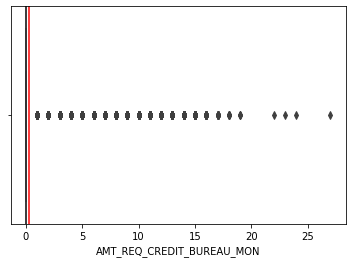

In [63]:
sns.boxplot(df.AMT_REQ_CREDIT_BUREAU_MON)
plt.axvline(df.AMT_REQ_CREDIT_BUREAU_MON.mean(), color='red')
plt.axvline(df.AMT_REQ_CREDIT_BUREAU_MON.median(), color='black')
plt.show()

In [64]:
df.AMT_REQ_CREDIT_BUREAU_MON.fillna(df.AMT_REQ_CREDIT_BUREAU_MON.median(),inplace=True)

In [65]:
df.AMT_REQ_CREDIT_BUREAU_MON.isnull().sum()

0

In [66]:
df.AMT_REQ_CREDIT_BUREAU_QRT.isnull().sum()

41519

In [67]:
df.AMT_REQ_CREDIT_BUREAU_QRT.describe()

count    265992.000000
mean          0.265474
std           0.794056
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

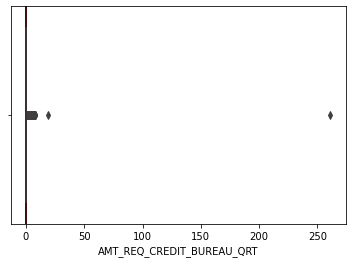

In [68]:
sns.boxplot(df.AMT_REQ_CREDIT_BUREAU_QRT)
plt.axvline(df.AMT_REQ_CREDIT_BUREAU_QRT.mean(), color='red')
plt.axvline(df.AMT_REQ_CREDIT_BUREAU_QRT.median(), color='black')
plt.show()

In [69]:
df.AMT_REQ_CREDIT_BUREAU_QRT.fillna(df.AMT_REQ_CREDIT_BUREAU_QRT.median(),inplace=True)

In [70]:
df.AMT_REQ_CREDIT_BUREAU_QRT.isnull().sum()

0

In [71]:
df.AMT_REQ_CREDIT_BUREAU_YEAR.isnull().sum()

41519

In [72]:
df.AMT_REQ_CREDIT_BUREAU_YEAR.describe()

count    265992.000000
mean          1.899974
std           1.869295
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

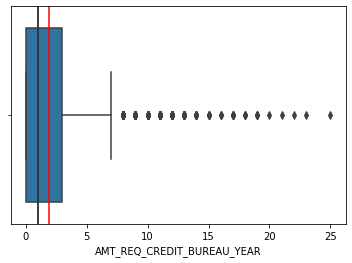

In [73]:
sns.boxplot(df.AMT_REQ_CREDIT_BUREAU_YEAR)
plt.axvline(df.AMT_REQ_CREDIT_BUREAU_YEAR.mean(), color='red')
plt.axvline(df.AMT_REQ_CREDIT_BUREAU_YEAR.median(), color='black')
plt.show()

In [74]:
df.AMT_REQ_CREDIT_BUREAU_YEAR.fillna(df.AMT_REQ_CREDIT_BUREAU_YEAR.median(),inplace=True)

In [75]:
df.AMT_REQ_CREDIT_BUREAU_YEAR.isnull().sum()

0

In [76]:
df.EXT_SOURCE_3.isnull().sum()

60965

In [77]:
df.EXT_SOURCE_3.describe()

count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64

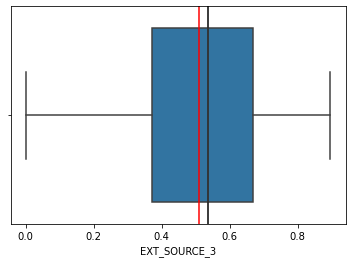

In [78]:
sns.boxplot(df.EXT_SOURCE_3)
plt.axvline(df.EXT_SOURCE_3.mean(), color='red')
plt.axvline(df.EXT_SOURCE_3.median(), color='black')
plt.show()

In [79]:
# As there is no outliers using mean to replace null values
df.EXT_SOURCE_3.fillna(df.EXT_SOURCE_3.mean(),inplace=True)

In [80]:
df.EXT_SOURCE_3.isnull().sum()

0

In [81]:
df.EXT_SOURCE_2.isnull().sum()

660

In [82]:
df.EXT_SOURCE_2.describe()

count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.173617e-08
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64

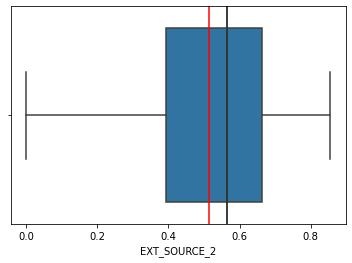

In [83]:
sns.boxplot(df.EXT_SOURCE_2)
plt.axvline(df.EXT_SOURCE_2.mean(), color='red')
plt.axvline(df.EXT_SOURCE_2.median(), color='black')
plt.show()

In [84]:
# As there is no outliers using mean to replace null values
df.EXT_SOURCE_2.fillna(df.EXT_SOURCE_2.mean(),inplace=True)

In [85]:
df.EXT_SOURCE_2.isnull().sum()

0

In [86]:
df.AMT_ANNUITY.describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

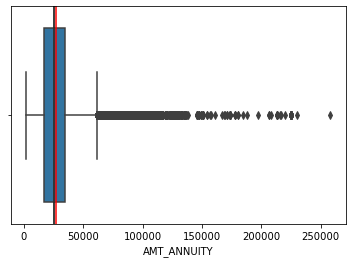

In [87]:
sns.boxplot(df.AMT_ANNUITY)
plt.axvline(df.AMT_ANNUITY.mean(), color='red')
plt.axvline(df.AMT_ANNUITY.median(), color='black')
plt.show()

In [88]:
# As ouliers are present replacing null values with median
df.AMT_ANNUITY.fillna(df.AMT_ANNUITY.median(),inplace=True)

In [89]:
df.AMT_ANNUITY.isnull().sum()

0

In [90]:
df.CNT_FAM_MEMBERS.describe()

count    307509.000000
mean          2.152665
std           0.910682
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

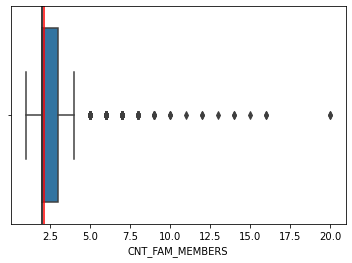

In [91]:
sns.boxplot(df.CNT_FAM_MEMBERS)
plt.axvline(df.CNT_FAM_MEMBERS.mean(), color='red')
plt.axvline(df.CNT_FAM_MEMBERS.median(), color='black')
plt.show()

In [92]:
df.CNT_FAM_MEMBERS.fillna(df.CNT_FAM_MEMBERS.median(),inplace=True)

In [93]:
df.CNT_FAM_MEMBERS.isnull().sum()

0

In [94]:
df.DAYS_LAST_PHONE_CHANGE.isnull().sum()

1

In [95]:
df.DAYS_LAST_PHONE_CHANGE.describe()

count    307510.000000
mean       -962.858788
std         826.808487
min       -4292.000000
25%       -1570.000000
50%        -757.000000
75%        -274.000000
max           0.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

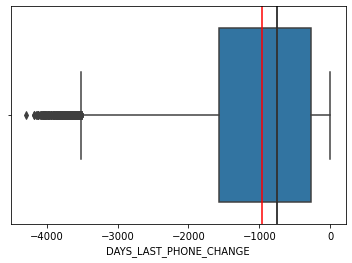

In [96]:
sns.boxplot(df.DAYS_LAST_PHONE_CHANGE)
plt.axvline(df.DAYS_LAST_PHONE_CHANGE.mean(), color='red')
plt.axvline(df.DAYS_LAST_PHONE_CHANGE.median(), color='black')
plt.show()

In [97]:
df.DAYS_LAST_PHONE_CHANGE.fillna(df.DAYS_LAST_PHONE_CHANGE.median(),inplace=True)

In [98]:
df.DAYS_LAST_PHONE_CHANGE.isnull().sum()

0

In [99]:
df.isnull().sum()

SK_ID_CURR                    0
TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 73, dtype: int64

In [100]:
# df[ df.describe().columns].isna().sum().tolist()

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  AMT_GOODS_PRICE              307511 non-null  float64
 11  NAME_TYPE_SUITE              307511 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [102]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.510853,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.510853,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.510853,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


Converting negative values of columns DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION,  DAYS_ID_PUBLISH, DAYS_LAST_PHONE_CHANGE 

In [103]:
df.DAYS_BIRTH = abs(df.DAYS_BIRTH)
df.DAYS_EMPLOYED = abs(df.DAYS_EMPLOYED)
df.DAYS_ID_PUBLISH = abs(df.DAYS_ID_PUBLISH)
df.DAYS_REGISTRATION = abs(df.DAYS_REGISTRATION)
df.DAYS_LAST_PHONE_CHANGE = abs(df.DAYS_LAST_PHONE_CHANGE)

In [104]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.510853,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.510853,2.0,0.0,2.0,0.0,617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.510853,0.0,0.0,0.0,0.0,1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


Changing CNT_FAM_MEMBERS column type to int

In [105]:
df.CNT_FAM_MEMBERS = df.CNT_FAM_MEMBERS.astype('int64')

Separating Categorical and Numerical columns

In [106]:
categorical_col = list(set(df.columns) - set(df.describe().columns))
categorical_col

['NAME_FAMILY_STATUS',
 'NAME_EDUCATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'NAME_INCOME_TYPE',
 'NAME_HOUSING_TYPE',
 'CODE_GENDER',
 'NAME_CONTRACT_TYPE',
 'ORGANIZATION_TYPE',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'OCCUPATION_TYPE',
 'NAME_TYPE_SUITE']

In [107]:
numerical_col = df.describe().columns
numerical_col

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMEN

Analysing Gender column

In [108]:
df.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [109]:
# There are 4 'XNA' values in CODE_GENDER Column, which can be imputed by Female as female values are 65% so it will not affect analysis
df.loc[df.CODE_GENDER == 'XNA','CODE_GENDER'] = 'F'


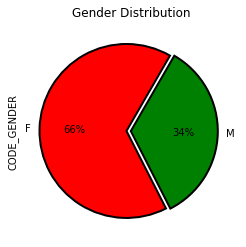

In [110]:
df.CODE_GENDER.value_counts().plot.pie(autopct = "%1.0f%%",colors = ['red','green'],startangle = 60,wedgeprops={'linewidth':2,'edgecolor':'k'},explode=[.05,0])
plt.title("Gender Distribution")
plt.show()

Imbalance Analysis

In [111]:
df.TARGET.value_counts(normalize=True)*100

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

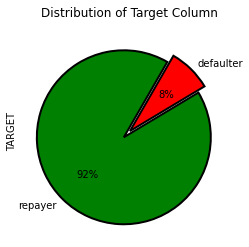

In [112]:
df.TARGET.value_counts().plot.pie(autopct = "%1.0f%%",colors = ['green','red'],startangle = 60,wedgeprops={'linewidth':2,'edgecolor':'k'},explode=[.1,0], labels=['repayer','defaulter'])
plt.title("Distribution of Target Column")
plt.show()

In [113]:
target_0 = df.loc[df.TARGET == 0]
target_1 = df.loc[df.TARGET== 1]

In [114]:
categorical_col = df.select_dtypes(include=['object']).columns
categorical_col

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE'],
      dtype='object')

Univariate Analysis for categorical variables

### Observation: More loans are Cash Loans

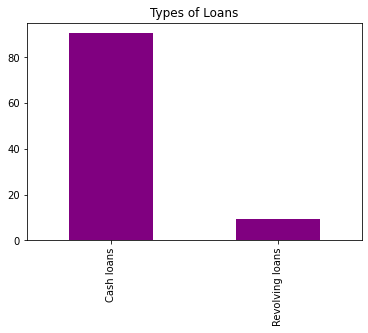

In [115]:
(df.NAME_CONTRACT_TYPE.value_counts(normalize=True)*100).plot.bar(color="purple")
plt.title("Types of Loans")
plt.show()

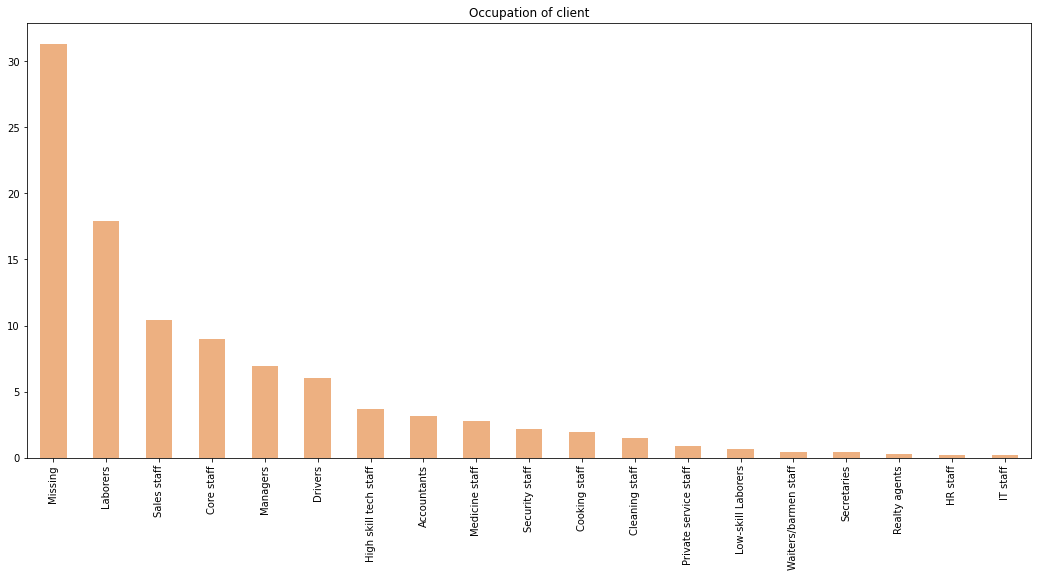

In [116]:
fig = plt.figure(figsize=(18,8))
(df.OCCUPATION_TYPE.value_counts(normalize=True)*100).plot.bar(cmap='flare')
plt.title("Occupation of client")
plt.show()

### Observation: Most of clients don't have own car

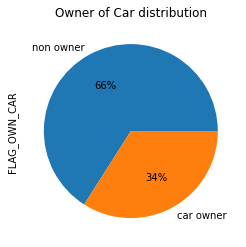

In [117]:
(df.FLAG_OWN_CAR.value_counts(normalize=True)*100).plot.pie(autopct = "%1.0f%%", labels=['non owner','car owner'])
plt.title("Owner of Car distribution")
plt.show()

### Observation: More than 60% clients don't own a house

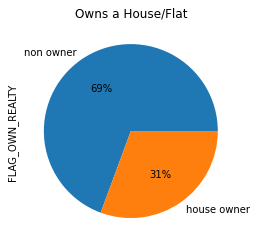

In [118]:
(df.FLAG_OWN_REALTY.value_counts(normalize=True)*100).plot.pie(autopct = "%1.0f%%", labels=['non owner','house owner'])
plt.title("Owns a House/Flat")
plt.show()

### Observation: More than 80% client are not accompanied in their loan

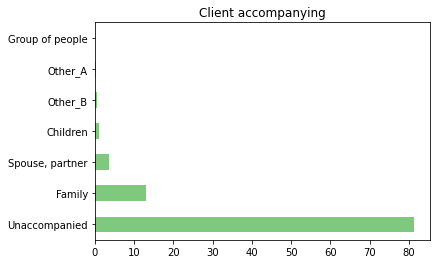

In [119]:
(df.NAME_TYPE_SUITE.value_counts(normalize=True)*100).plot.barh(cmap="Accent")
plt.title("Client accompanying")
plt.show()

### Observation: More than 50% client are working who got loan from bank

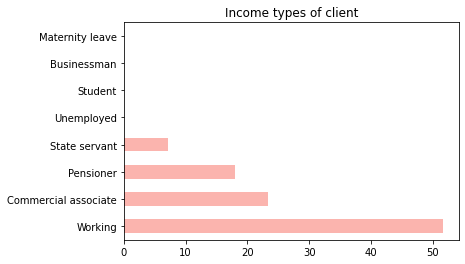

In [120]:
(df.NAME_INCOME_TYPE.value_counts(normalize=True)*100).plot.barh(cmap="Pastel1")
plt.title("Income types of client")
plt.show()

### Observation: Most of the client had secondary education

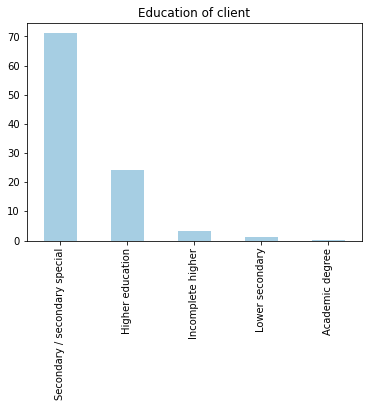

In [121]:
(df.NAME_EDUCATION_TYPE.value_counts(normalize=True)*100).plot.bar(cmap="Paired")
plt.title("Education of client")
plt.show()

### Observation: More than 60% client are married who took loan

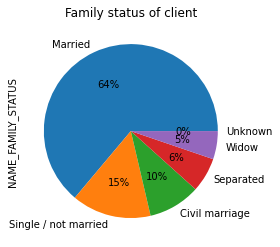

In [122]:
(df.NAME_FAMILY_STATUS.value_counts(normalize=True)*100).plot.pie(autopct = "%1.0f%%")
plt.title("Family status of client")
plt.show()

### Observation: More than 80% clients are living in house

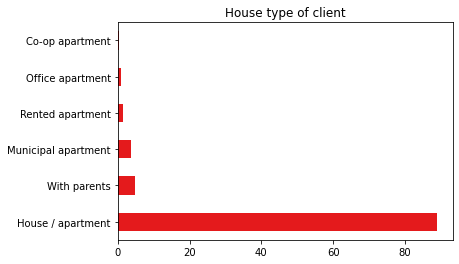

In [123]:
(df.NAME_HOUSING_TYPE.value_counts(normalize=True)*100).plot.barh(cmap='Set1')
plt.title("House type of client")
plt.show()

### Observation:For most of the clients loan process start on Tuesday

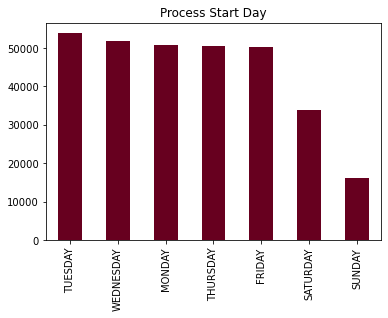

In [124]:
df.WEEKDAY_APPR_PROCESS_START.value_counts().plot.bar(cmap='PuRd_r')
plt.title("Process Start Day")
plt.show()

### Observation: Most of the client are in Business Entity Type 3 organization but for around 18% client information is not available

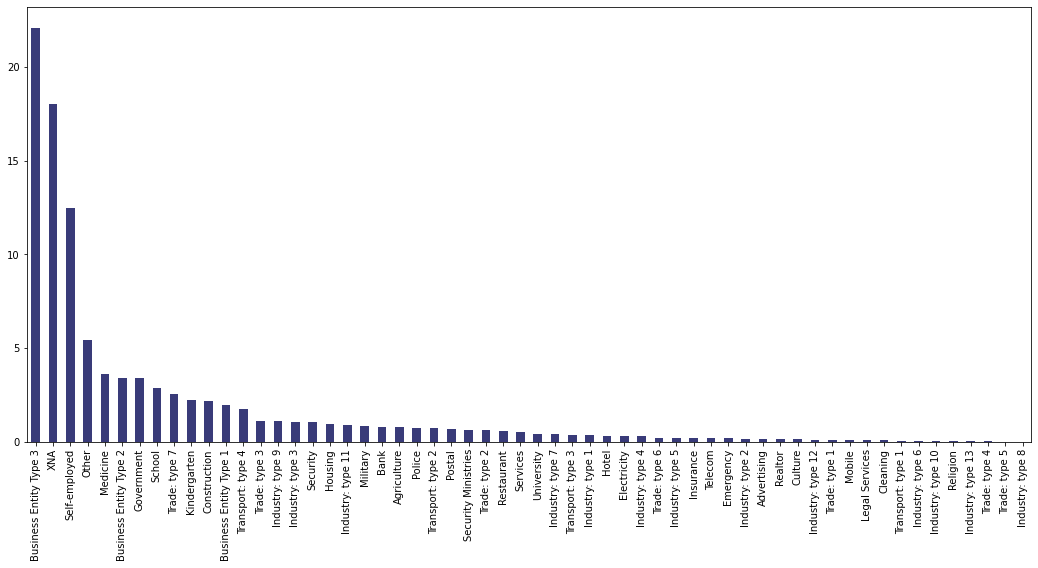

In [125]:
fig = plt.figure(figsize=(18,8))
(df.ORGANIZATION_TYPE.value_counts(normalize=True)*100).plot.bar(cmap='tab20b')
plt.show()

Univariate Analysis for numerical variables

In [126]:
['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'],

(['SK_ID_CURR',
  'TARGET',
  'CNT_CHILDREN',
  'AMT_INCOME_TOTAL',
  'AMT_CREDIT',
  'AMT_ANNUITY',
  'AMT_GOODS_PRICE',
  'REGION_POPULATION_RELATIVE',
  'DAYS_BIRTH',
  'DAYS_EMPLOYED',
  'DAYS_REGISTRATION',
  'DAYS_ID_PUBLISH',
  'FLAG_MOBIL',
  'FLAG_EMP_PHONE',
  'FLAG_WORK_PHONE',
  'FLAG_CONT_MOBILE',
  'FLAG_PHONE',
  'FLAG_EMAIL',
  'CNT_FAM_MEMBERS',
  'REGION_RATING_CLIENT',
  'REGION_RATING_CLIENT_W_CITY',
  'HOUR_APPR_PROCESS_START',
  'REG_REGION_NOT_LIVE_REGION',
  'REG_REGION_NOT_WORK_REGION',
  'LIVE_REGION_NOT_WORK_REGION',
  'REG_CITY_NOT_LIVE_CITY',
  'REG_CITY_NOT_WORK_CITY',
  'LIVE_CITY_NOT_WORK_CITY',
  'OBS_30_CNT_SOCIAL_CIRCLE',
  'DEF_30_CNT_SOCIAL_CIRCLE',
  'OBS_60_CNT_SOCIAL_CIRCLE',
  'DEF_60_CNT_SOCIAL_CIRCLE',
  'DAYS_LAST_PHONE_CHANGE',
  'FLAG_DOCUMENT_2',
  'FLAG_DOCUMENT_3',
  'FLAG_DOCUMENT_4',
  'FLAG_DOCUMENT_5',
  'FLAG_DOCUMENT_6',
  'FLAG_DOCUMENT_7',
  'FLAG_DOCUMENT_8',
  'FLAG_DOCUMENT_9',
  'FLAG_DOCUMENT_10',
  'FLAG_DOCUMENT_11',
  'FL

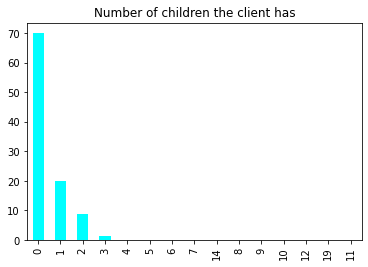

In [127]:
(df.CNT_CHILDREN.value_counts(normalize=True)*100).plot.bar(cmap='cool')
plt.title("Number of children the client has")
plt.show()

In [128]:
# Dividing Income into different groups

In [129]:
df.AMT_INCOME_TOTAL = df.AMT_INCOME_TOTAL/100000

# Binning Amt_Income_Total into 12 groups
bins = [0,1,2,3,4,5,6,7,8,9,10,1200]
range = ['0-100K','100K-200K', '200k-300k','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k','800k-900k','900k-1M', '1M Above']

df.AMT_INCOME_TOTAL_RANGE =pd.cut(df.AMT_INCOME_TOTAL,bins,labels=range)

### Observation: Half of the client has income in between 100K-200K

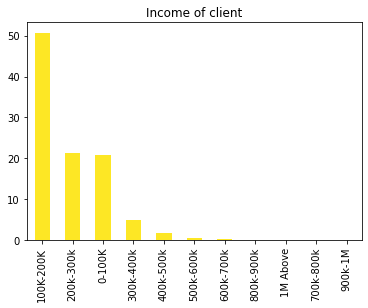

In [130]:
(df.AMT_INCOME_TOTAL_RANGE.value_counts(normalize=True)*100).plot.bar(cmap='viridis_r')
plt.title("Income of client")
plt.show()

In [131]:
df.AMT_CREDIT = df.AMT_CREDIT/100000

# Creating bins for Credit amount

bins = [0,1,2,3,4,5,6,7,8,9,10,100]
range = ['0-100K','100K-200K', '200k-300k','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k',
       '800k-900k','900k-1M', '1M Above']

df.AMT_CREDIT_RANGE = pd.cut(df.AMT_CREDIT,bins=bins,labels=range)

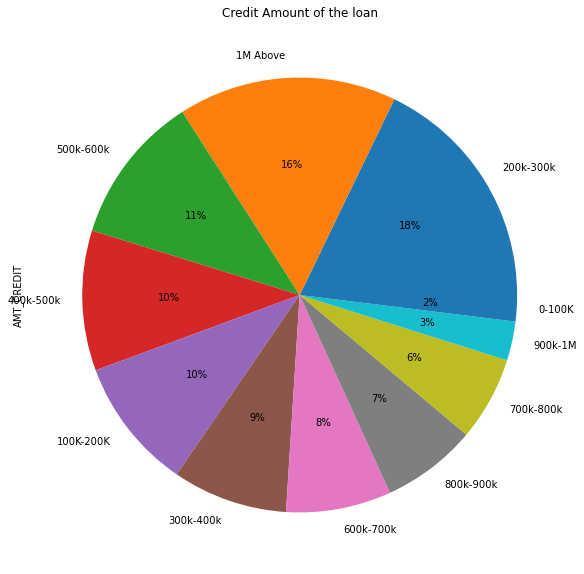

In [132]:
fig = plt.figure(figsize=(38,10))
(df.AMT_CREDIT_RANGE.value_counts(normalize=True)*100).plot.pie(autopct = "%1.0f%%")
plt.title("Credit Amount of the loan")
plt.show()

### Observation: 16% client took loan of 1M and above

In [133]:
df.AMT_GOODS_PRICE = df.AMT_GOODS_PRICE/100000

# Creating bins for Credit amount
bins = [0,1,2,3,4,5,6,7,8,9,10,100]
range = ['0-100K','100K-200K', '200k-300k','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k',
       '800k-900k','900k-1M', '1M Above']

df.AMT_GOODS_PRICE_RANGE = pd.cut(df.AMT_GOODS_PRICE,bins=bins,labels=range)

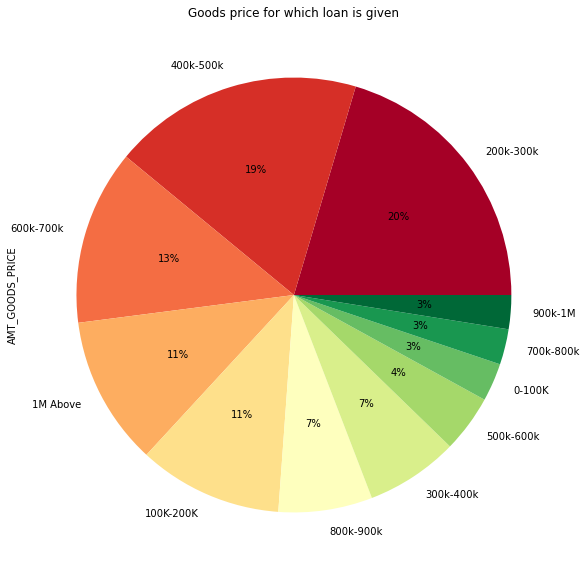

In [134]:
fig = plt.figure(figsize=(38,10))
(df.AMT_GOODS_PRICE_RANGE.value_counts(normalize=True)*100).plot.pie(autopct = "%1.0f%%", cmap='RdYlGn')
plt.title("Goods price for which loan is given")
plt.show()

### Observation: 20% client took a loan to buy goods of price between 200k-300k

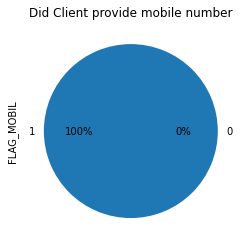

In [135]:
(df.FLAG_MOBIL.value_counts(normalize=True)*100).plot.pie(autopct = "%1.0f%%")
plt.title("Did Client provide mobile number")
plt.show()

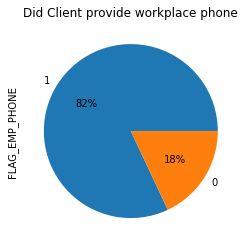

In [136]:
# fig = plt.figure(figsize=(18,10))
(df.FLAG_EMP_PHONE.value_counts(normalize=True)*100).plot.pie(autopct = "%1.0f%%")
plt.title("Did Client provide workplace phone")
plt.show()

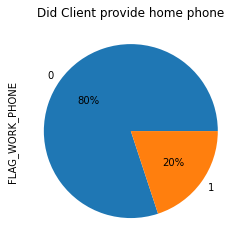

In [137]:
(df.FLAG_WORK_PHONE.value_counts(normalize=True)*100).plot.pie(autopct = "%1.0f%%")
plt.title("Did Client provide home phone")
plt.show()

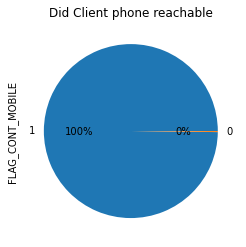

In [138]:
(df.FLAG_CONT_MOBILE.value_counts(normalize=True)*100).plot.pie(autopct = "%1.0f%%")
plt.title("Did Client phone reachable")
plt.show()

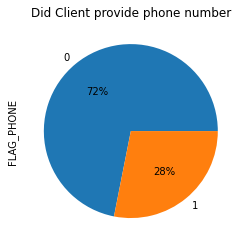

In [139]:
(df.FLAG_PHONE.value_counts(normalize=True)*100).plot.pie(autopct = "%1.0f%%")
plt.title("Did Client provide phone number")
plt.show()

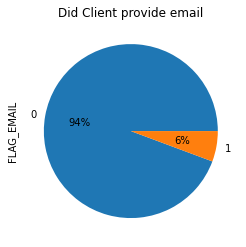

In [140]:
(df.FLAG_EMAIL.value_counts(normalize=True)*100).plot.pie(autopct = "%1.0f%%")
plt.title("Did Client provide email")
plt.show()

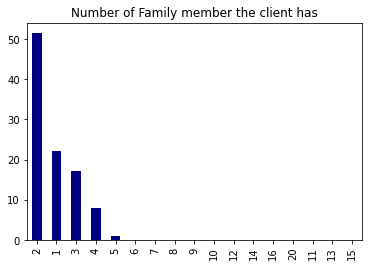

In [141]:
(df.CNT_FAM_MEMBERS.value_counts(normalize=True)*100).plot.bar(cmap='jet')
plt.title("Number of Family member the client has")
plt.show()

In [142]:
df.REGION_RATING_CLIENT_W_CITY.value_counts()

2    229484
3     43860
1     34167
Name: REGION_RATING_CLIENT_W_CITY, dtype: int64

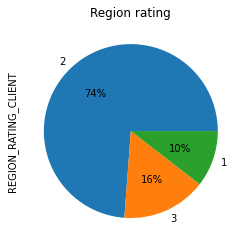

In [143]:
(df.REGION_RATING_CLIENT.value_counts(normalize=True)*100).plot.pie(autopct = "%1.0f%%")
plt.title("Region rating")
plt.show()

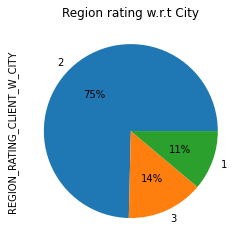

In [144]:
(df.REGION_RATING_CLIENT_W_CITY.value_counts(normalize=True)*100).plot.pie(autopct = "%1.0f%%")
plt.title("Region rating w.r.t City")
plt.show()

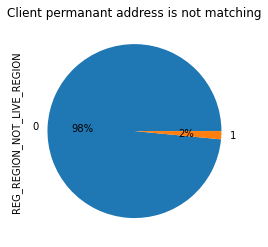

In [145]:
(df.REG_REGION_NOT_LIVE_REGION.value_counts(normalize=True)*100).plot.pie(autopct = "%1.0f%%")
plt.title("Client permanant address is not matching")
plt.show()

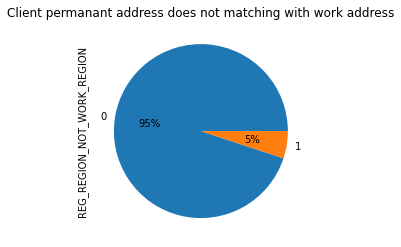

In [146]:
(df.REG_REGION_NOT_WORK_REGION.value_counts(normalize=True)*100).plot.pie(autopct = "%1.0f%%")
plt.title("Client permanant address does not matching with work address")
plt.show()

In [147]:
df['AGE'] = df['DAYS_BIRTH'] // 365
bins = [0,20,30,40,50,100]
rnge = ['0-20','20-30','30-40','40-50','50 above']

# Create Age_Group column
df['AGE_GROUP']=pd.cut(df['AGE'],bins=bins,labels=rnge)

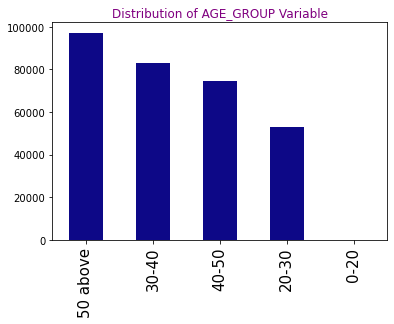

In [148]:
df.AGE_GROUP.value_counts().plot.bar(cmap='plasma')
title = "Distribution of AGE_GROUP Variable"
plt.title(title,color="purple")
plt.xticks(size=15,color='Black')
plt.show()

In [149]:
df.AGE_GROUP.value_counts(normalize=True)*100

50 above    31.604398
30-40       27.028952
40-50       24.194582
20-30       17.171743
0-20         0.000325
Name: AGE_GROUP, dtype: float64

### OBSERVATION: 31% client have age above 50 years. More than 55% of loan applicants have age over 40 years.

In [150]:
# Creating bins for experience
df['YEARS_EMPLOYED'] = df['DAYS_EMPLOYED'] // 365
bins = [-1,5,10,20,30,40,50,60,1000]
range = ['0-5','5-10','10-20','20-30','30-40','40-50','50-60','60 above']

df['YEARS_EMPLOYED_RANGE']=pd.cut(df['YEARS_EMPLOYED'],bins=bins,labels=range)

In [151]:
df['YEARS_EMPLOYED_RANGE'].value_counts(normalize=True)*100

0-5         49.604079
5-10        18.205202
60 above    18.007161
10-20       10.620108
20-30        2.734536
30-40        0.772005
40-50        0.056909
50-60        0.000000
Name: YEARS_EMPLOYED_RANGE, dtype: float64

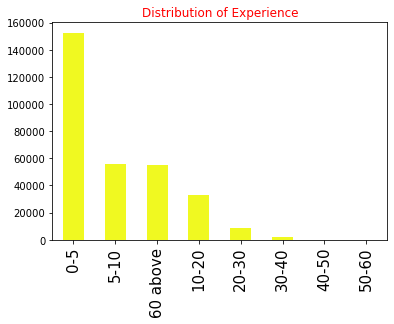

In [152]:
df.YEARS_EMPLOYED_RANGE.value_counts().plot.bar(cmap='plasma_r')
title = "Distribution of Experience"
plt.title(title,color="red")
plt.xticks(size=15,color='Black')
plt.show()

### OBSERVATION: Around 50% of the clients have work experience within 0-5 years and 70% of them have less than 10 years of work experience

Finding Correlation 

In [153]:
df_repayer = df[df.TARGET == 0]
df_defaulter = df[df.TARGET == 1]

In [154]:
repayer_corrmat = df_repayer.corr()

Univariate analysis

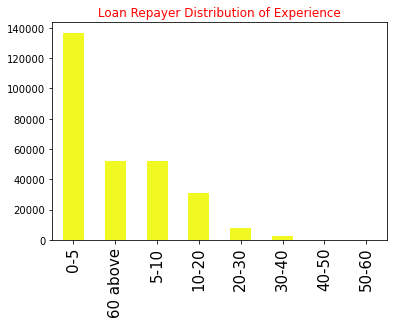

In [155]:
df_repayer.YEARS_EMPLOYED_RANGE.value_counts().plot.bar(cmap='plasma_r')
title = "Loan Repayer Distribution of Experience"
plt.title(title,color="red")
plt.xticks(size=15,color='Black')
plt.show()

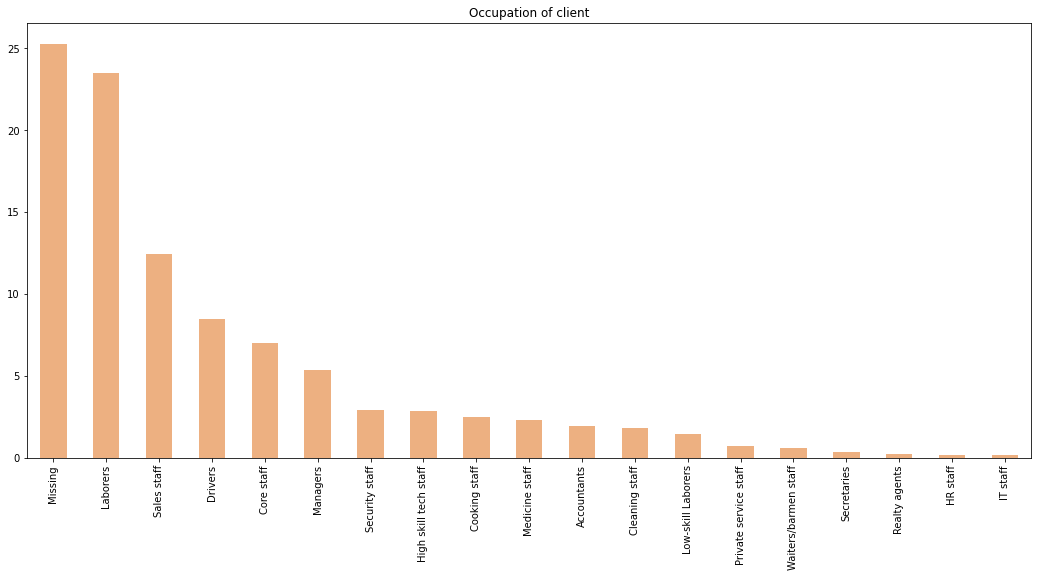

In [156]:
fig = plt.figure(figsize=(18,8))
(df_defaulter.OCCUPATION_TYPE.value_counts(normalize=True)*100).plot.bar(cmap='flare')
plt.title("Occupation of client")
plt.show()

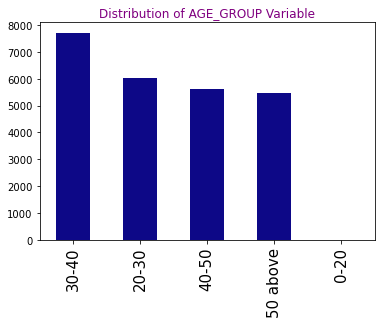

In [157]:
df_defaulter.AGE_GROUP.value_counts().plot.bar(cmap='plasma')
title = "Distribution of AGE_GROUP Variable"
plt.title(title,color="purple")
plt.xticks(size=15,color='Black')
plt.show()

### Observation: 30-40 age group people are most likely defaulter

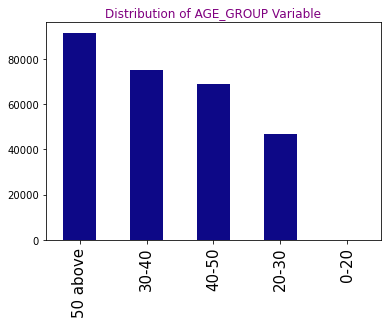

In [158]:
df_repayer.AGE_GROUP.value_counts().plot.bar(cmap='plasma')
title = "Distribution of AGE_GROUP Variable"
plt.title(title,color="purple")
plt.xticks(size=15,color='Black')
plt.show()

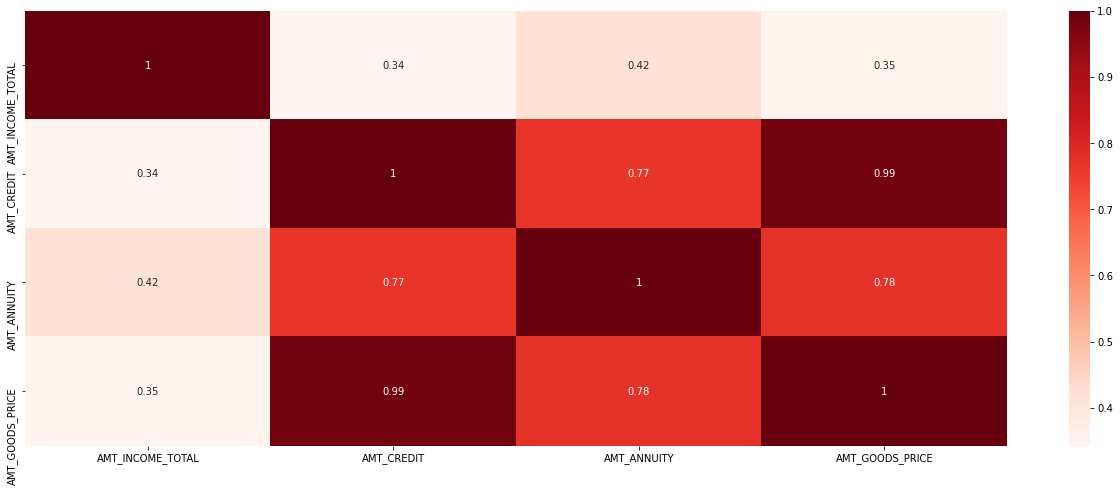

In [159]:
# multivariate analysis
fig = plt.figure(figsize=(22,8)) 
sns.heatmap(df_repayer[["AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE"]].corr(), annot= True, cmap= "Reds")
plt.show()

### Observation: Very high correlation between AMT_CREDIT and AMT_GOODS_PRICE - Applicants owning goods of high value can take loans of higher amounts

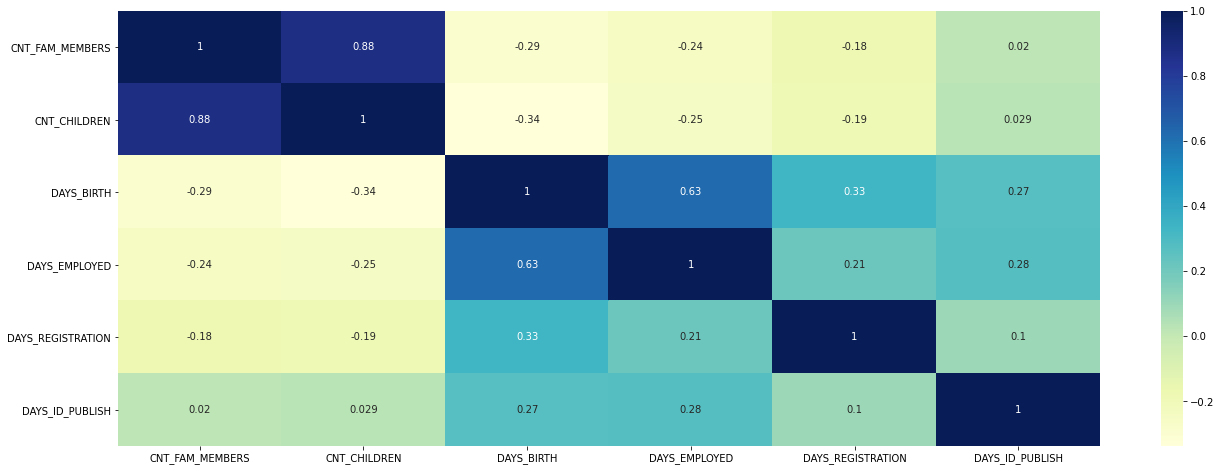

In [160]:
fig = plt.figure(figsize=(22,8))
sns.heatmap(df_repayer[["CNT_FAM_MEMBERS", "CNT_CHILDREN", "DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION", "DAYS_ID_PUBLISH"]].corr(), annot= True, cmap= "YlGnBu")
plt.show()


### Observation: If client is repayer then high correlation between CNT_FAM_MEMBERS and CNT_CHILDREN, Means most of the client has child

In [161]:
repayer_corrdf = repayer_corrmat.where(np.triu(np.ones(repayer_corrmat.shape), k=1).astype(np.bool))
repayer_corrdf = repayer_corrdf.unstack().reset_index()
repayer_corrdf.columns = ['Column1', 'Column2', 'Correlation']
repayer_corrdf.dropna(subset = ['Correlation'], inplace = True)
repayer_corrdf.sort_values(by = 'Correlation', ascending = False).head(10)

,Column1,Column2,Correlation
3915,YEARS_EMPLOYED,DAYS_EMPLOYED,1.000000
3851,AGE,DAYS_BIRTH,0.999711
2046,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.998510
382,AMT_GOODS_PRICE,AMT_CREDIT,0.987022
1279,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.950149
1136,CNT_FAM_MEMBERS,CNT_CHILDREN,0.878571
1535,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.861861
2110,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.859371
1727,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.830381
383,AMT_GOODS_PRICE,AMT_ANNUITY,0.776421


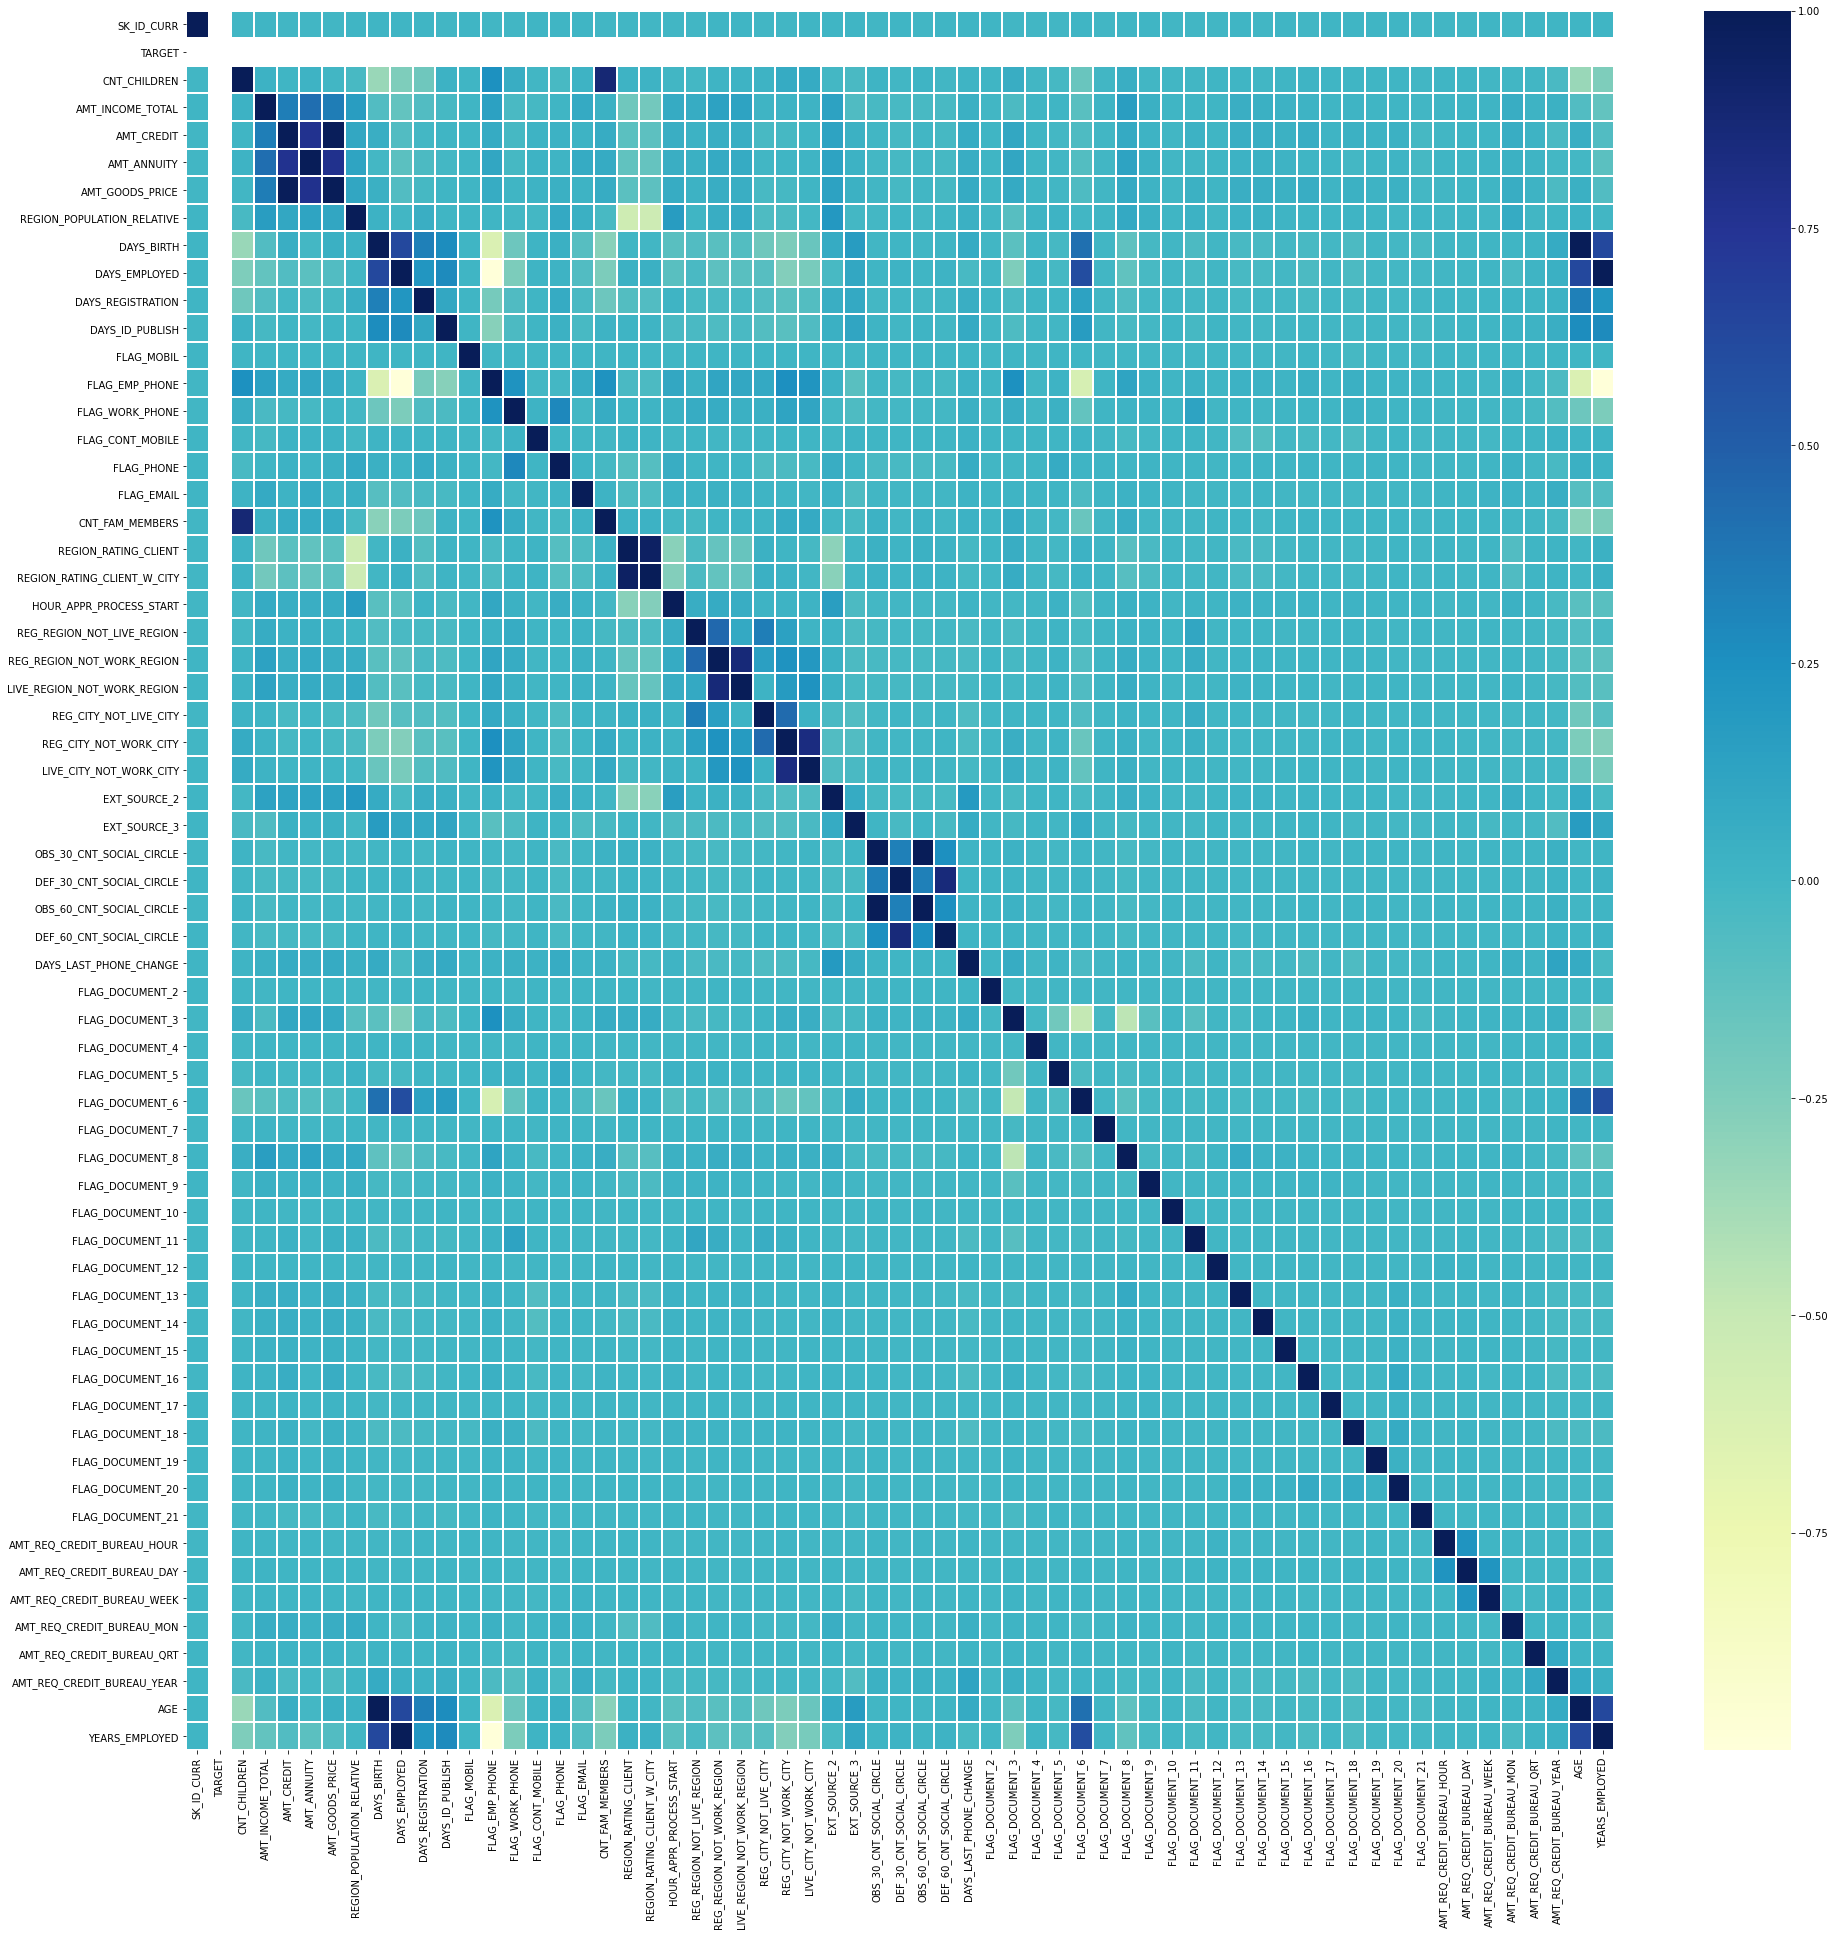

In [162]:
fig = plt.figure(figsize=(32,32))
ax = sns.heatmap(repayer_corrmat, cmap="YlGnBu",annot=False,linewidth =1)

### Correlating factors of repayers:
Credit amount is highly correlated with
1) amount of goods price
2) total income
3) employment days

In [163]:
defaulter_corrmat = df_defaulter.corr()

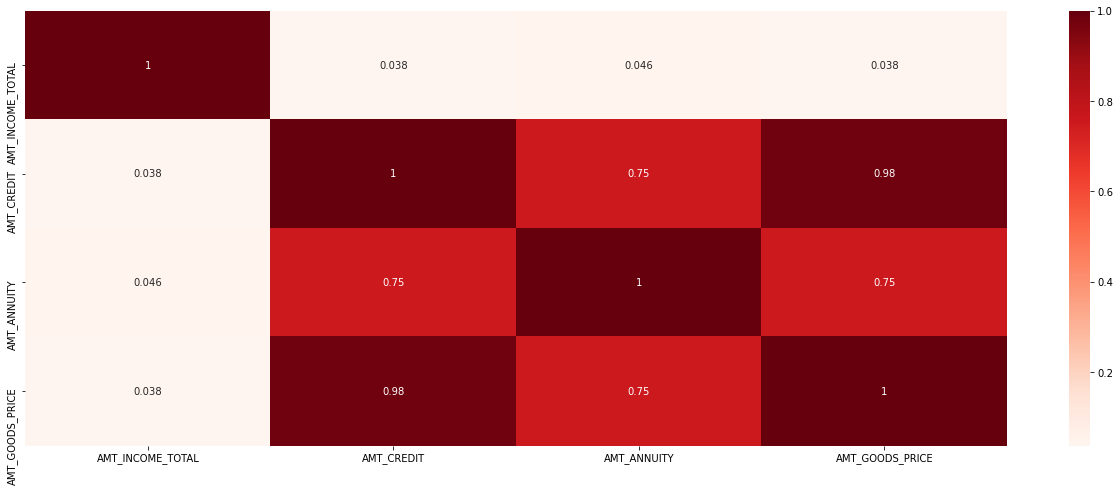

In [164]:
fig = plt.figure(figsize=(22,8))
sns.heatmap(df_defaulter[["AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE"]].corr(), annot= True, cmap= "Reds")
plt.show()

### Observation: Very high correlation between AMT_CREDIT and AMT_GOODS_PRICE - Applicants owning goods of high value can take loans of higher amounts

In [165]:
defaulter_corrdf = defaulter_corrmat.where(np.triu(np.ones(defaulter_corrmat.shape), k=1).astype(np.bool))
defaulter_corrdf = defaulter_corrdf.unstack().reset_index()
defaulter_corrdf.columns = ['Column1', 'Column2', 'Correlation']
defaulter_corrdf.dropna(subset = ['Correlation'], inplace = True)
defaulter_corrdf.sort_values(by = 'Correlation', ascending = False).head(10)

,Column1,Column2,Correlation
3915,YEARS_EMPLOYED,DAYS_EMPLOYED,1.000000
3851,AGE,DAYS_BIRTH,0.999691
2046,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.998270
382,AMT_GOODS_PRICE,AMT_CREDIT,0.982783
1279,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.956637
1136,CNT_FAM_MEMBERS,CNT_CHILDREN,0.885484
2110,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.869016
1535,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.847885
1727,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.778540
383,AMT_GOODS_PRICE,AMT_ANNUITY,0.752295


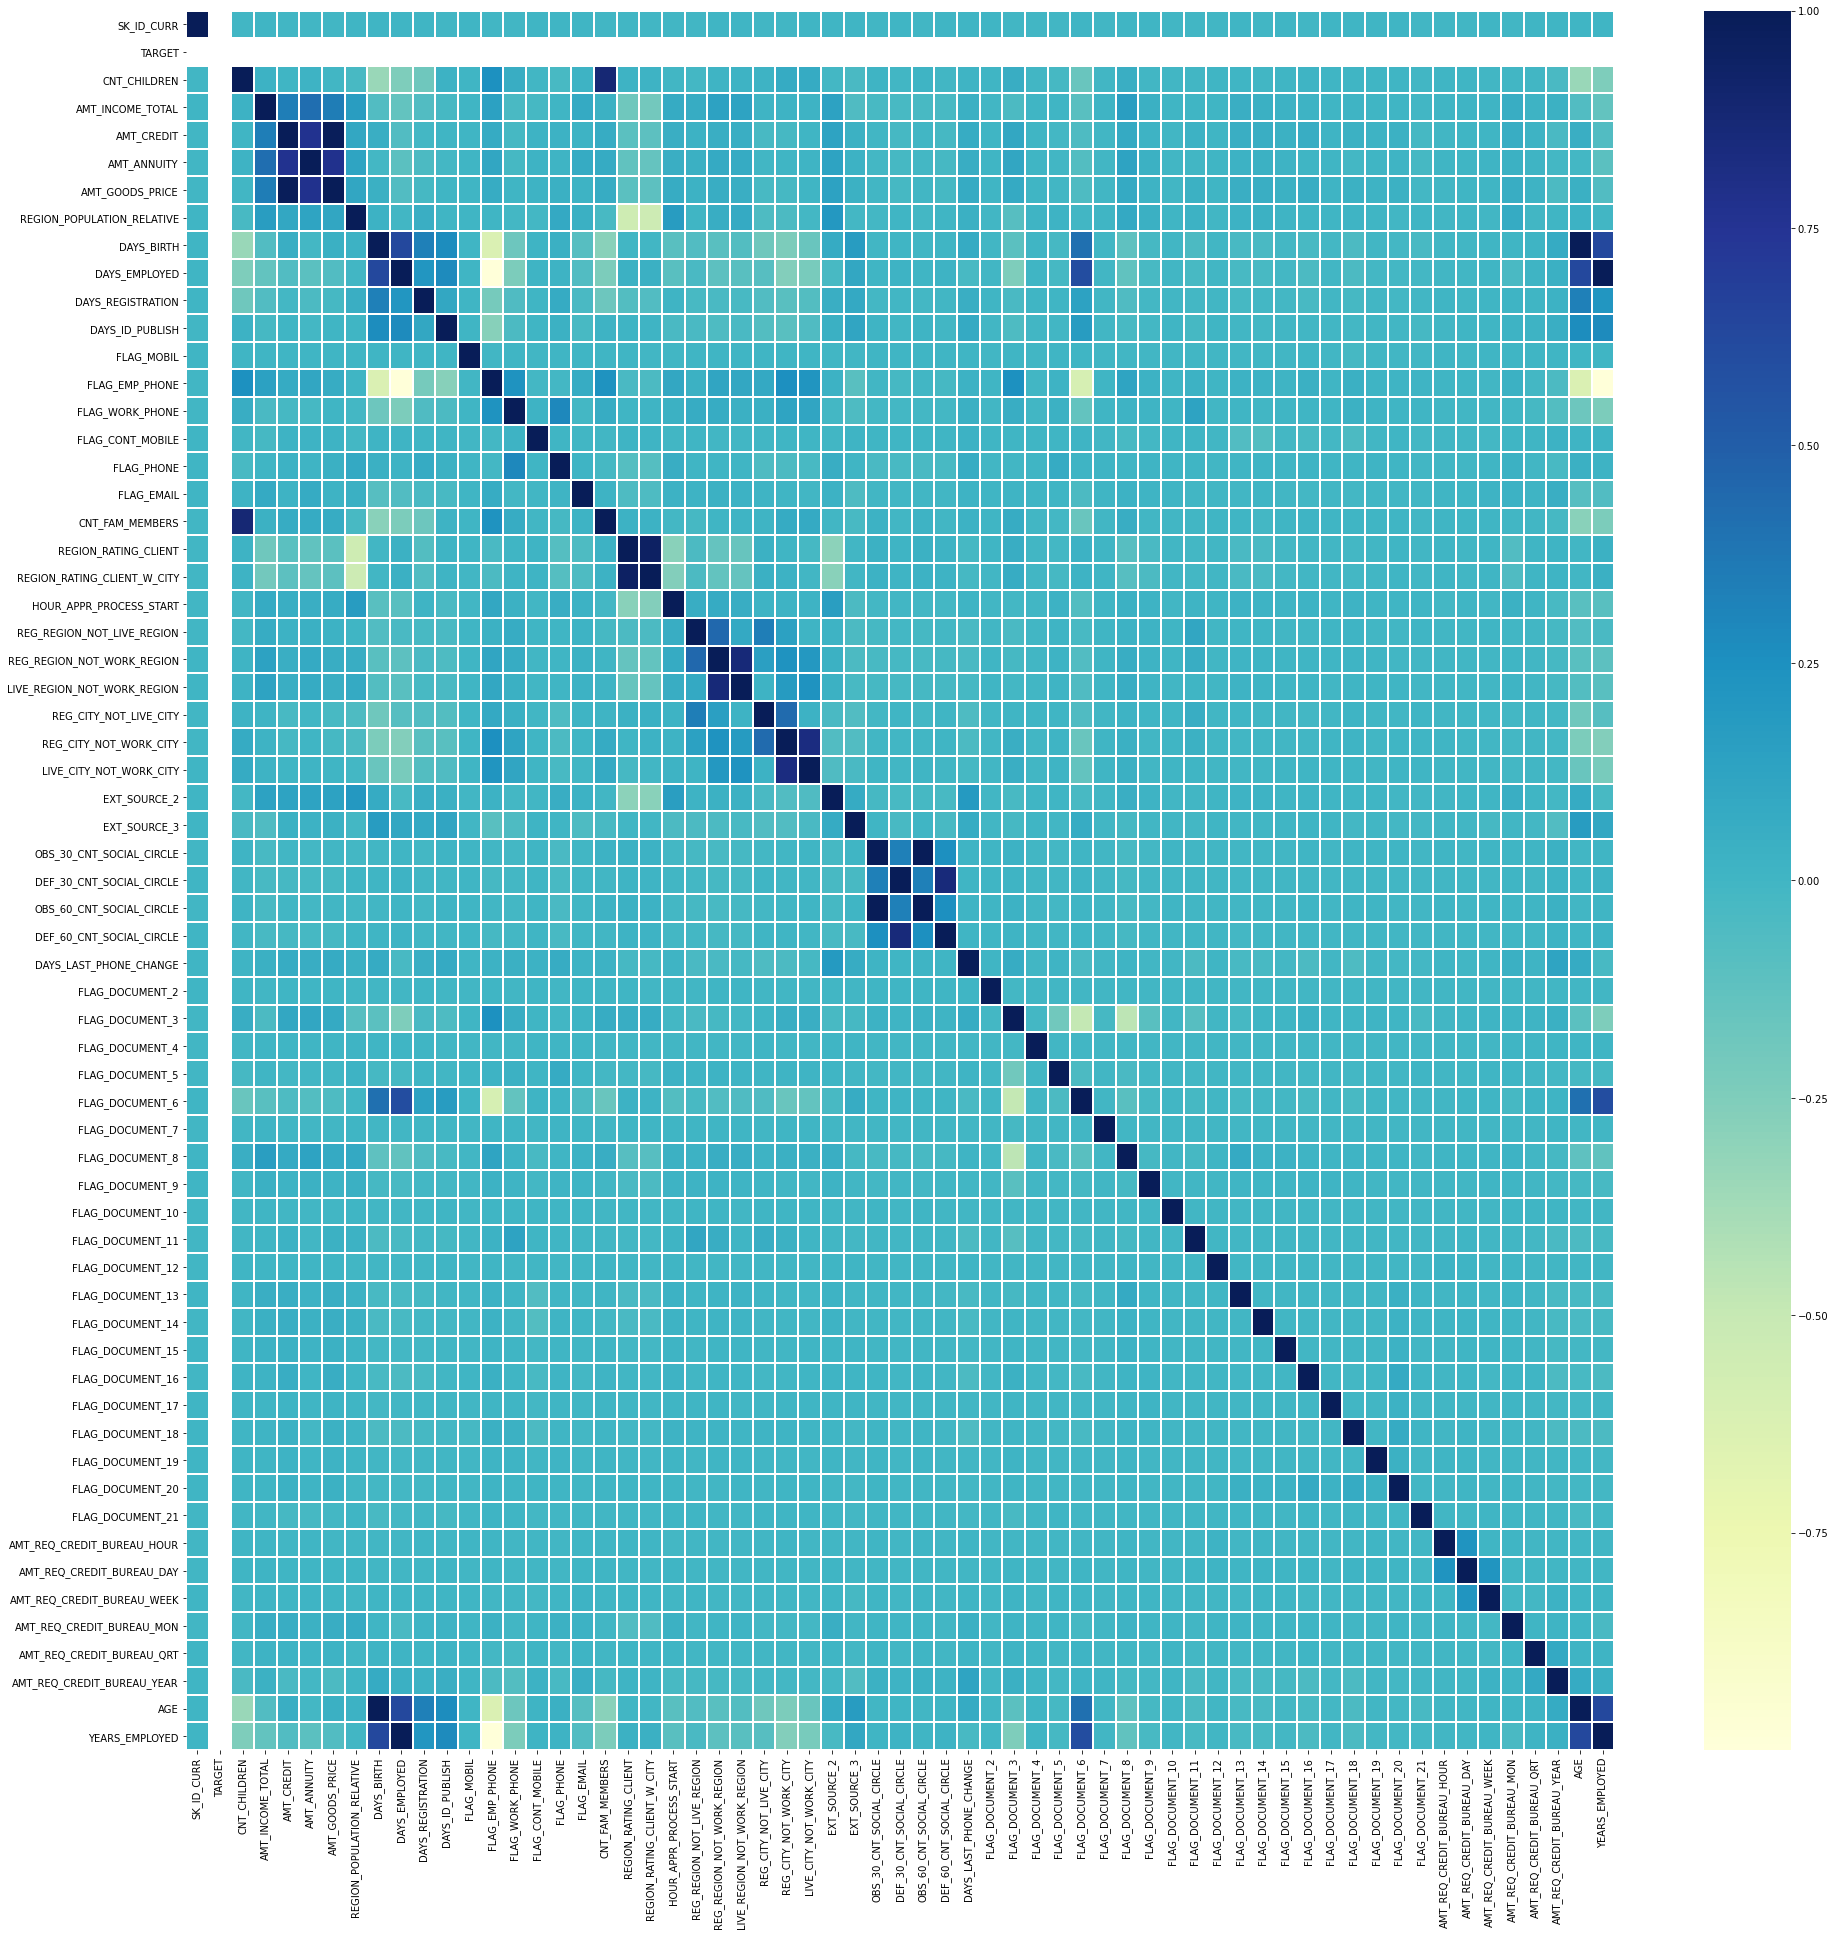

In [166]:
fig = plt.figure(figsize=(32,32))
ax = sns.heatmap(repayer_corrmat, cmap="YlGnBu",annot=False,linewidth =1)

### Corelating factors of defaulters
1) Credit amount is highly correlated with amount of goods price which is same as repayers.
2) But the loan annuity correlation with credit amount has slightly reduced in defaulters
3) There is a severe drop in the correlation between total income of the client and the credit amount amongst defaulters 

Univariate Analysis on repayer and defaulter

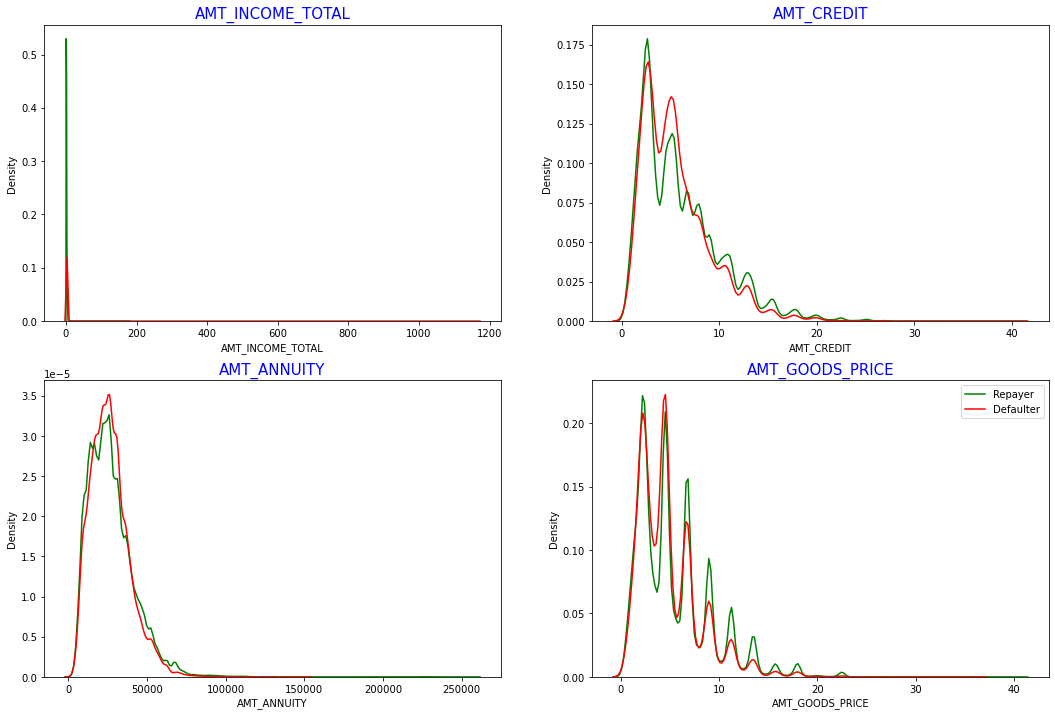

In [167]:
# Plotting the numerical columns related to amount as distribution plot
amt_col = df[[ 'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE']]

fig = plt.figure(figsize=(18,12))

for i in enumerate(amt_col):
    plt.subplot(2,2,i[0]+1)
    sns.distplot(df_repayer[i[1]], hist=False, color='g', label ="Repayer")
    sns.distplot(df_defaulter[i[1]], hist=False, color='r',label ="Defaulter")
    plt.title(i[1], fontdict={'fontsize' : 15, 'fontweight' : 7, 'color' : 'Blue'}) 
    
plt.legend()

plt.show() 

Bivariate and Multivariate Analysis

<AxesSubplot:xlabel='NAME_HOUSING_TYPE'>

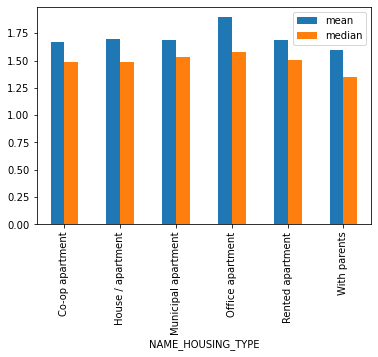

In [168]:
# Bivariate Numerical - Categorical analysis 
df_repayer.groupby('NAME_HOUSING_TYPE')['AMT_INCOME_TOTAL'].aggregate(["mean", "median"]).plot.bar()

#### Observation: Loan repayer clients whose income is higher they are living in Office apartment

<AxesSubplot:xlabel='NAME_INCOME_TYPE'>

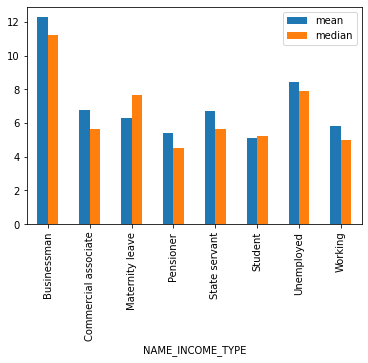

In [169]:
df_repayer.groupby('NAME_INCOME_TYPE')['AMT_CREDIT'].aggregate(["mean", "median"]).plot.bar()

#### Observation:Repayer whose occupation is Business credits more amount as compare to others

<AxesSubplot:xlabel='NAME_HOUSING_TYPE'>

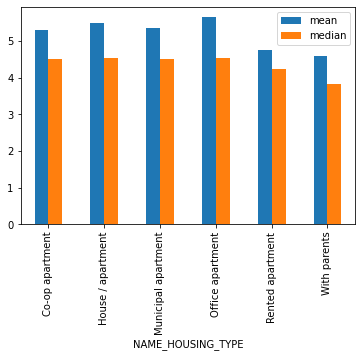

In [170]:
df_repayer.groupby('NAME_HOUSING_TYPE')['AMT_GOODS_PRICE'].aggregate(["mean", "median"]).plot.bar()

<AxesSubplot:xlabel='NAME_EDUCATION_TYPE'>

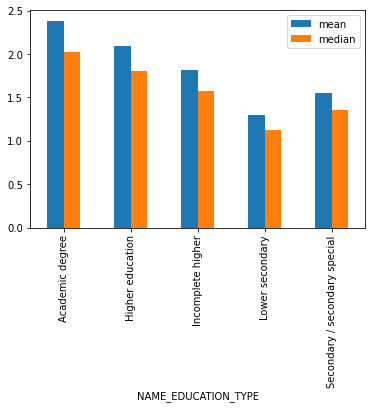

In [171]:
df_repayer.groupby('NAME_EDUCATION_TYPE')['AMT_INCOME_TOTAL'].aggregate(["mean", "median"]).plot.bar()

#### Observation: Loan repayer who having academic degree they are earning more

<AxesSubplot:xlabel='NAME_INCOME_TYPE'>

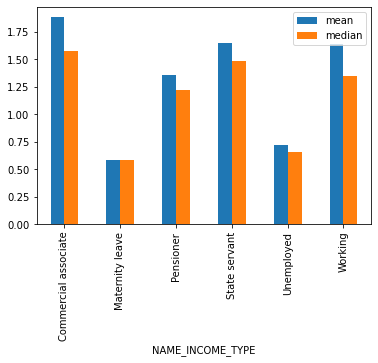

In [172]:
df_defaulter.groupby('NAME_INCOME_TYPE')['AMT_INCOME_TOTAL'].aggregate(["mean", "median"]).plot.bar()

#### Observation: Defaulter who are commercial associate have more income as compare to others

<AxesSubplot:xlabel='NAME_INCOME_TYPE'>

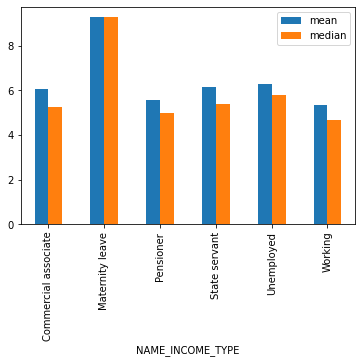

In [173]:
df_defaulter.groupby('NAME_INCOME_TYPE')['AMT_CREDIT'].aggregate(["mean", "median"]).plot.bar()

#### Observation: Defaulter who are on maternity leave i.e Females they are crediting more amount

<AxesSubplot:xlabel='NAME_HOUSING_TYPE'>

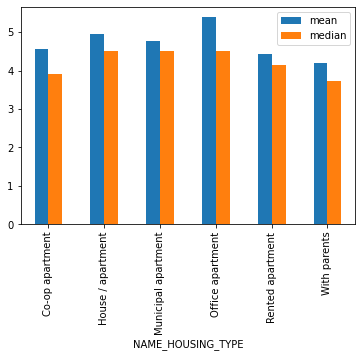

In [174]:
df_defaulter.groupby('NAME_HOUSING_TYPE')['AMT_GOODS_PRICE'].aggregate(["mean", "median"]).plot.bar()

<AxesSubplot:xlabel='NAME_EDUCATION_TYPE'>

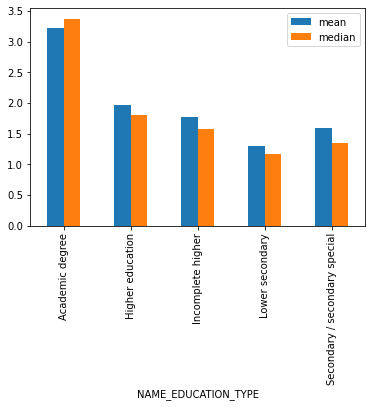

In [175]:
df_defaulter.groupby('NAME_EDUCATION_TYPE')['AMT_INCOME_TOTAL'].aggregate(["mean", "median"]).plot.bar()

<Figure size 1296x864 with 0 Axes>

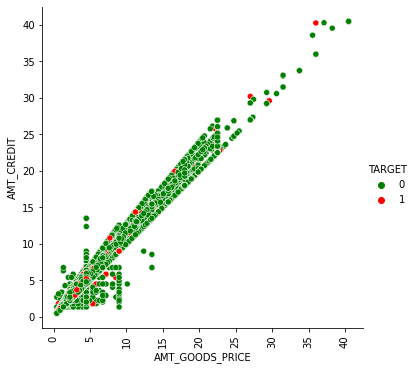

In [176]:
plt.figure(figsize=(18,12))
sns.relplot(x='AMT_GOODS_PRICE', y='AMT_CREDIT', data=df, hue="TARGET",kind='scatter', palette = ['g','r'], legend=True)
plt.xticks(rotation=90)
plt.show()

### Observation: When the credit amount goes above 2M, there is an increase in defaulters.

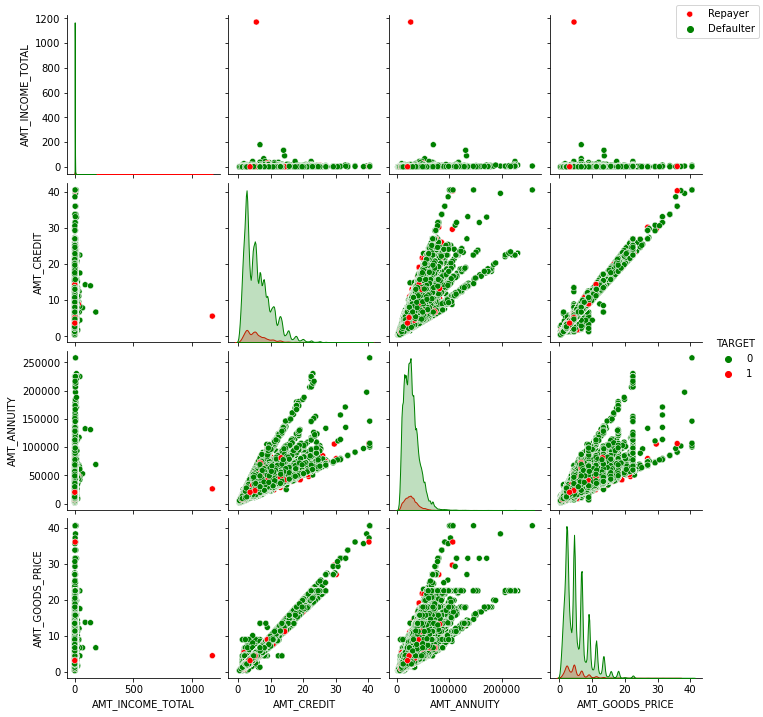

In [177]:
# multivariate analysis on application amount data
amount = df[[ 'AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE','TARGET']]
amount = amount[(amount["AMT_GOODS_PRICE"].notnull()) & (amount["AMT_ANNUITY"].notnull())]
ax= sns.pairplot(amount,hue="TARGET",palette=["g","r"])
ax.fig.legend(labels=['Repayer','Defaulter'])
plt.show()

### Observation: 
1) AMT_CREDIT and AMT_GOODS_PRICE are highly correlated as shown in scatterplot most of the data are consolidated in form of line
2) There are very less defaulters for AMT_CREDIT < 2M
3) AS AMT_ANNUITY is increasing number of defaulter is also increasing

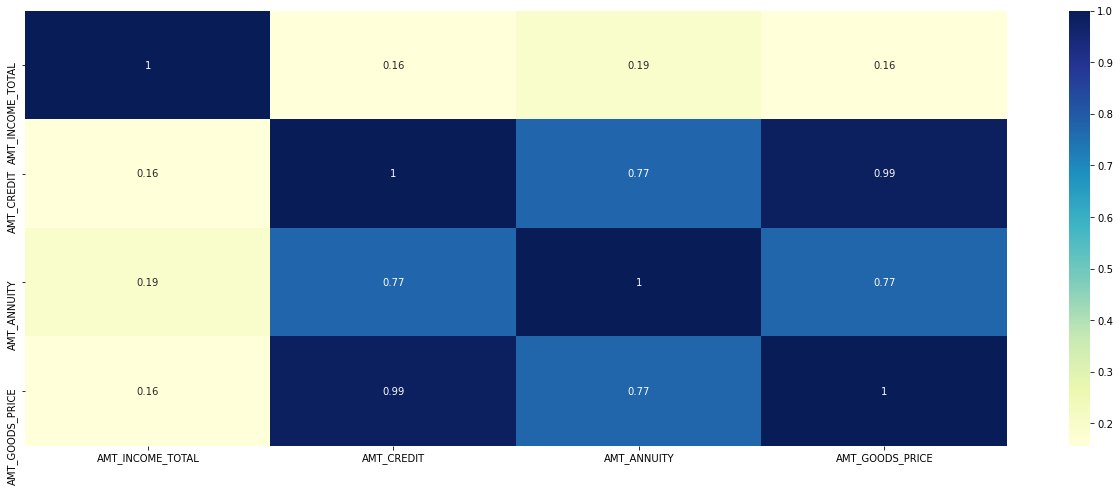

In [178]:
fig = plt.figure(figsize=(22,8))
sns.heatmap(df[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE']].corr(), annot= True, cmap= "YlGnBu")
plt.show()

In [179]:
df_1 = pd.read_csv('previous_application.csv')

In [180]:
df_1.shape

(1670214, 37)

In [181]:
df_1.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [182]:
pd.set_option('display.max_columns', None)
df_1.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [183]:
null_values_data = round((df_1.isnull().sum()*100/df_1.shape[0]),2)
null_values_data

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               53.64
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              53.64
RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
N

Text(0.5, 0, 'Columns')

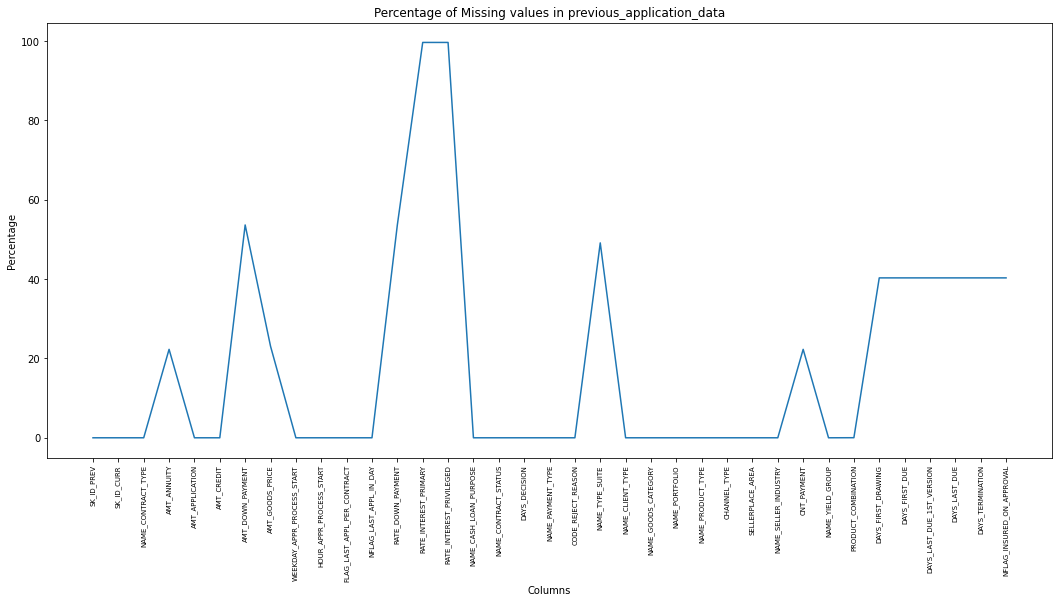

In [184]:
fig = plt.figure(figsize=(18,8))
previous_application_missing_values_plot = sns.lineplot(data=null_values_data)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values in previous_application_data")
plt.ylabel("Percentage")
plt.xlabel("Columns")

In [185]:
# Dropping column where null values are greater than 50%
df_1 = df_1.drop([ 'AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED'],axis=1)

In [186]:
new_null_values_data = round((df_1.isnull().sum()*100/df_1.shape[0]),2)
new_null_values_data

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
NAME_SELLER_INDUSTRY            0.00
CNT_PAYMENT                    22.29
NAME_YIELD_GROUP                0.00
PRODUCT_COMBINATION             0.02
D

Text(0.5, 0, 'Columns')

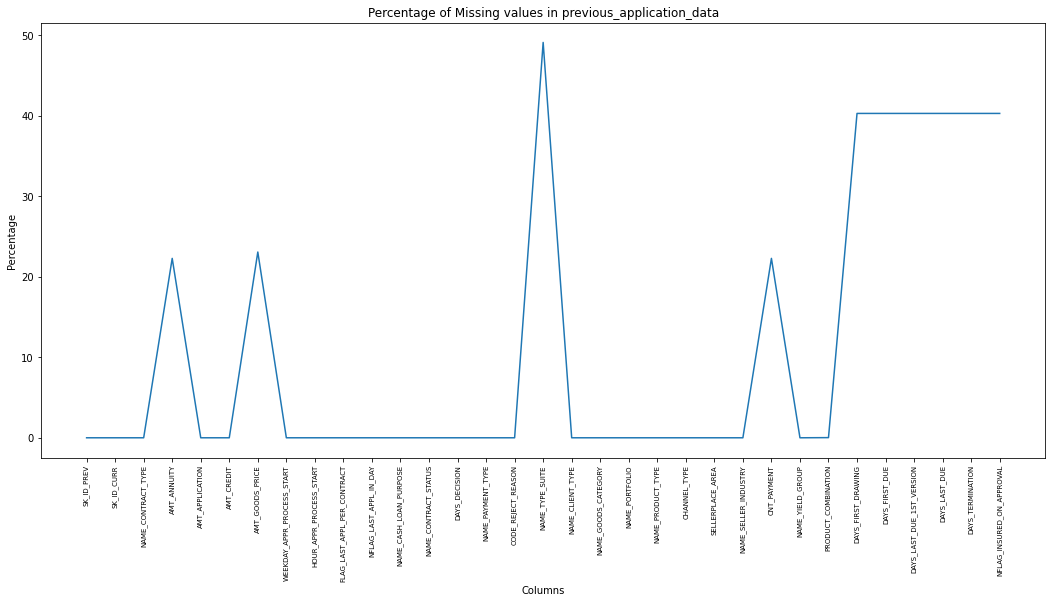

In [187]:
fig = plt.figure(figsize=(18,8))
previous_application_missing_values_plot = sns.lineplot(data=new_null_values_data)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values in previous_application_data")
plt.ylabel("Percentage")
plt.xlabel("Columns")

Filling null values with median as all containes outliers

In [188]:
df_1.AMT_ANNUITY.describe()

count    1.297979e+06
mean     1.595512e+04
std      1.478214e+04
min      0.000000e+00
25%      6.321780e+03
50%      1.125000e+04
75%      2.065842e+04
max      4.180581e+05
Name: AMT_ANNUITY, dtype: float64

In [189]:
df_1.AMT_ANNUITY.isnull().sum()

372235

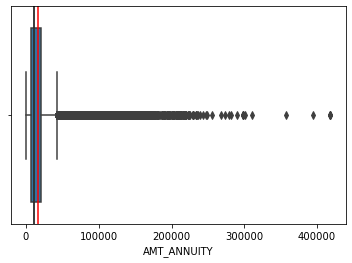

In [190]:
sns.boxplot(df_1.AMT_ANNUITY)
plt.axvline(df_1.AMT_ANNUITY.mean(), color='red')
plt.axvline(df_1.AMT_ANNUITY.median(), color='black')
plt.show()

In [191]:
df_1.AMT_ANNUITY.fillna(df_1.AMT_ANNUITY.median(),inplace=True)

In [192]:
df_1.AMT_ANNUITY.isnull().sum()

0

In [193]:
df_1.AMT_GOODS_PRICE.describe()

count    1.284699e+06
mean     2.278473e+05
std      3.153966e+05
min      0.000000e+00
25%      5.084100e+04
50%      1.123200e+05
75%      2.340000e+05
max      6.905160e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [194]:
df_1.AMT_GOODS_PRICE.isnull().sum()

385515

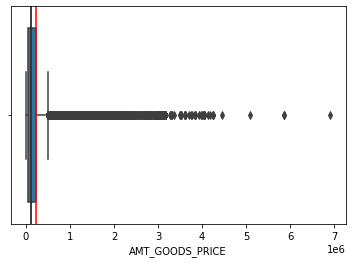

In [195]:
sns.boxplot(df_1.AMT_GOODS_PRICE)
plt.axvline(df_1.AMT_GOODS_PRICE.mean(), color='red')
plt.axvline(df_1.AMT_GOODS_PRICE.median(), color='black')
plt.show()

In [196]:
df_1.AMT_GOODS_PRICE.fillna(df_1.AMT_GOODS_PRICE.median(),inplace=True)

In [197]:
df_1.AMT_GOODS_PRICE.isnull().sum()

0

In [198]:
df_1.CNT_PAYMENT.isnull().sum()

372230

In [199]:
df_1.CNT_PAYMENT.describe()

count    1.297984e+06
mean     1.605408e+01
std      1.456729e+01
min      0.000000e+00
25%      6.000000e+00
50%      1.200000e+01
75%      2.400000e+01
max      8.400000e+01
Name: CNT_PAYMENT, dtype: float64

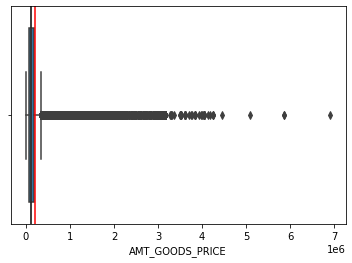

In [200]:
sns.boxplot(df_1.AMT_GOODS_PRICE)
plt.axvline(df_1.AMT_GOODS_PRICE.mean(), color='red')
plt.axvline(df_1.AMT_GOODS_PRICE.median(), color='black')
plt.show()

In [201]:
df_1.CNT_PAYMENT.fillna(df_1.CNT_PAYMENT.median(),inplace=True)

In [202]:
df_1.CNT_PAYMENT.isnull().sum()

0

In [203]:
df_1.DAYS_FIRST_DRAWING.isnull().sum()

673065

In [204]:
df_1.DAYS_FIRST_DRAWING.describe()

count    997149.000000
mean     342209.855039
std       88916.115834
min       -2922.000000
25%      365243.000000
50%      365243.000000
75%      365243.000000
max      365243.000000
Name: DAYS_FIRST_DRAWING, dtype: float64

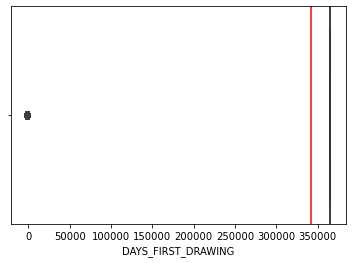

In [205]:
sns.boxplot(df_1.DAYS_FIRST_DRAWING)
plt.axvline(df_1.DAYS_FIRST_DRAWING.mean(), color='red')
plt.axvline(df_1.DAYS_FIRST_DRAWING.median(), color='black')
plt.show()

In [206]:
df_1.DAYS_FIRST_DRAWING.fillna(df_1.DAYS_FIRST_DRAWING.median(),inplace=True)

In [207]:
df_1.DAYS_FIRST_DRAWING.isnull().sum()

0

In [208]:
df_1.DAYS_FIRST_DUE.isnull().sum()

673065

In [209]:
df_1.DAYS_FIRST_DUE.describe()

count    997149.000000
mean      13826.269337
std       72444.869708
min       -2892.000000
25%       -1628.000000
50%        -831.000000
75%        -411.000000
max      365243.000000
Name: DAYS_FIRST_DUE, dtype: float64

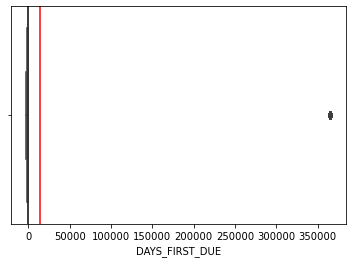

In [210]:
sns.boxplot(df_1.DAYS_FIRST_DUE)
plt.axvline(df_1.DAYS_FIRST_DUE.mean(), color='red')
plt.axvline(df_1.DAYS_FIRST_DUE.median(), color='black')
plt.show()

In [211]:
df_1.DAYS_FIRST_DUE.fillna(df_1.DAYS_FIRST_DUE.median(),inplace=True)

In [212]:
df_1.DAYS_LAST_DUE_1ST_VERSION.isnull().sum()

673065

In [213]:
df_1.DAYS_LAST_DUE_1ST_VERSION.describe()

count    997149.000000
mean      33767.774054
std      106857.034789
min       -2801.000000
25%       -1242.000000
50%        -361.000000
75%         129.000000
max      365243.000000
Name: DAYS_LAST_DUE_1ST_VERSION, dtype: float64

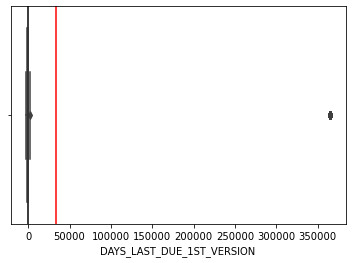

In [214]:
sns.boxplot(df_1.DAYS_LAST_DUE_1ST_VERSION)
plt.axvline(df_1.DAYS_LAST_DUE_1ST_VERSION.mean(), color='red')
plt.axvline(df_1.DAYS_LAST_DUE_1ST_VERSION.median(), color='black')
plt.show()

In [215]:
df_1.DAYS_LAST_DUE_1ST_VERSION.fillna(df_1.DAYS_LAST_DUE_1ST_VERSION.median(),inplace=True)

In [216]:
df_1.DAYS_LAST_DUE_1ST_VERSION.isnull().sum()

0

In [217]:
df_1.DAYS_LAST_DUE.isnull().sum()

673065

In [218]:
df_1.DAYS_LAST_DUE.describe()

count    997149.000000
mean      76582.403064
std      149647.415123
min       -2889.000000
25%       -1314.000000
50%        -537.000000
75%         -74.000000
max      365243.000000
Name: DAYS_LAST_DUE, dtype: float64

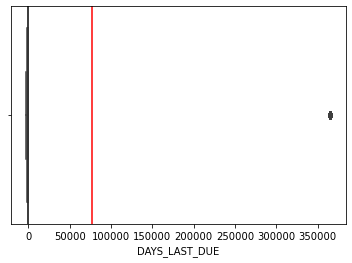

In [219]:
sns.boxplot(df_1.DAYS_LAST_DUE)
plt.axvline(df_1.DAYS_LAST_DUE.mean(), color='red')
plt.axvline(df_1.DAYS_LAST_DUE.median(), color='black')
plt.show()

In [220]:
df_1.DAYS_LAST_DUE.fillna(df_1.DAYS_LAST_DUE.median(),inplace=True)

In [221]:
df_1.DAYS_LAST_DUE.isnull().sum()

0

In [222]:
df_1.DAYS_TERMINATION.isnull().sum()

673065

In [223]:
df_1.DAYS_TERMINATION.describe()

count    997149.000000
mean      81992.343838
std      153303.516729
min       -2874.000000
25%       -1270.000000
50%        -499.000000
75%         -44.000000
max      365243.000000
Name: DAYS_TERMINATION, dtype: float64

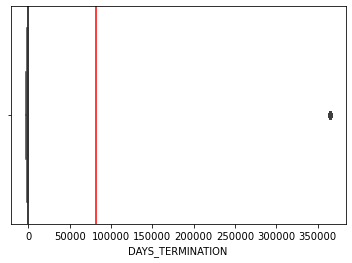

In [224]:
sns.boxplot(df_1.DAYS_TERMINATION)
plt.axvline(df_1.DAYS_TERMINATION.mean(), color='red')
plt.axvline(df_1.DAYS_TERMINATION.median(), color='black')
plt.show()

In [225]:
df_1.DAYS_TERMINATION.fillna(df_1.DAYS_TERMINATION.median(),inplace=True)

In [226]:
df_1.DAYS_TERMINATION.isnull().sum()

0

In [227]:
df_1.AMT_CREDIT.isnull().sum()

1

In [228]:
df_1.AMT_CREDIT.describe()

count    1.670213e+06
mean     1.961140e+05
std      3.185746e+05
min      0.000000e+00
25%      2.416050e+04
50%      8.054100e+04
75%      2.164185e+05
max      6.905160e+06
Name: AMT_CREDIT, dtype: float64

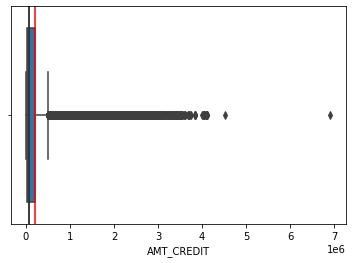

In [229]:
sns.boxplot(df_1.AMT_CREDIT)
plt.axvline(df_1.AMT_CREDIT.mean(), color='red')
plt.axvline(df_1.AMT_CREDIT.median(), color='black')
plt.show()

In [230]:
df_1.AMT_CREDIT.fillna(df_1.AMT_CREDIT.median(),inplace=True)

In [231]:
df_1.AMT_CREDIT.isnull().sum()

0

In [232]:
df_1.NFLAG_INSURED_ON_APPROVAL.isnull().sum()

673065

In [233]:
df_1.NFLAG_INSURED_ON_APPROVAL.describe()

count    997149.000000
mean          0.332570
std           0.471134
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: NFLAG_INSURED_ON_APPROVAL, dtype: float64

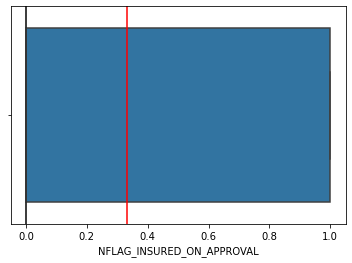

In [234]:
sns.boxplot(df_1.NFLAG_INSURED_ON_APPROVAL)
plt.axvline(df_1.NFLAG_INSURED_ON_APPROVAL.mean(), color='red')
plt.axvline(df_1.NFLAG_INSURED_ON_APPROVAL.median(), color='black')
plt.show()

In [235]:
# As there is no outliers using mean to fill null values
df_1.NFLAG_INSURED_ON_APPROVAL.fillna(df_1.NFLAG_INSURED_ON_APPROVAL.mean(),inplace=True)

In [236]:
df_1.NFLAG_INSURED_ON_APPROVAL.isnull().sum()

0

In [237]:
df_1.NAME_TYPE_SUITE.describe()

count            849809
unique                7
top       Unaccompanied
freq             508970
Name: NAME_TYPE_SUITE, dtype: object

In [238]:
df_1.NAME_TYPE_SUITE.isnull().sum()

820405

In [239]:
# As it is categorical variable. 'Unaccompanied' is top so replacing null values with it. 
df_1.NAME_TYPE_SUITE.fillna('Unaccompanied',inplace=True)

In [240]:
df_1.NAME_TYPE_SUITE.isnull().sum()

0

In [241]:
df_1.PRODUCT_COMBINATION.isnull().sum()

346

In [242]:
df_1.PRODUCT_COMBINATION.describe()

count     1669868
unique         17
top          Cash
freq       285990
Name: PRODUCT_COMBINATION, dtype: object

In [243]:
# As it is categorical variable. 'Cash' is top so replacing null values with it.
df_1.PRODUCT_COMBINATION.fillna('Cash',inplace=True)

In [244]:
df_1.PRODUCT_COMBINATION.isnull().sum()

0

In [245]:
df_1.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,-73,Cash through the bank,XAP,Unaccompanied,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.00000
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,1,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.00000
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,1,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.00000
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,1,XNA,Approved,-512,Cash through the bank,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.00000
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,1,Repairs,Refused,-781,Cash through the bank,HC,Unaccompanied,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,365243.0,-831.0,-361.0,-537.0,-499.0,0.33257


Converting negative values of columns DAYS_DECISION, SELLERPLACE_AREA, DAYS_FIRST_DUE, DAYS_LAST_DUE_1ST_VERSION, DAYS_LAST_DUE, DAYS_TERMINATION

In [246]:
df_1.DAYS_DECISION = abs(df_1.DAYS_DECISION)
df_1.SELLERPLACE_AREA = abs(df_1.SELLERPLACE_AREA)
df_1.DAYS_FIRST_DUE = abs(df_1.DAYS_FIRST_DUE)
df_1.DAYS_LAST_DUE_1ST_VERSION = abs(df_1.DAYS_LAST_DUE_1ST_VERSION)
df_1.DAYS_LAST_DUE = abs(df_1.DAYS_LAST_DUE)
df_1.DAYS_TERMINATION = abs(df_1.DAYS_TERMINATION)

In [247]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 33 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1670214 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670214 non-null  float64
 6   AMT_GOODS_PRICE              1670214 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 8   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 11  NAME_CASH_LOAN_PURPOSE       1670214 non-null  object 
 12  NAME_CONTRACT_STATUS         1670214 non-n

In [248]:
prev_categorical_col = list(set(df_1.columns) - set(df_1.describe().columns))
prev_categorical_col

['PRODUCT_COMBINATION',
 'FLAG_LAST_APPL_PER_CONTRACT',
 'NAME_CLIENT_TYPE',
 'NAME_SELLER_INDUSTRY',
 'WEEKDAY_APPR_PROCESS_START',
 'NAME_CONTRACT_STATUS',
 'NAME_YIELD_GROUP',
 'CODE_REJECT_REASON',
 'CHANNEL_TYPE',
 'NAME_GOODS_CATEGORY',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_PORTFOLIO',
 'NAME_CONTRACT_TYPE',
 'NAME_PAYMENT_TYPE',
 'NAME_PRODUCT_TYPE',
 'NAME_TYPE_SUITE']

In [249]:
prev_numerical_col = df_1.describe().columns
prev_numerical_col

Index(['SK_ID_PREV', 'SK_ID_CURR', 'AMT_ANNUITY', 'AMT_APPLICATION',
       'AMT_CREDIT', 'AMT_GOODS_PRICE', 'HOUR_APPR_PROCESS_START',
       'NFLAG_LAST_APPL_IN_DAY', 'DAYS_DECISION', 'SELLERPLACE_AREA',
       'CNT_PAYMENT', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

Univariate Analysis for categorical variables

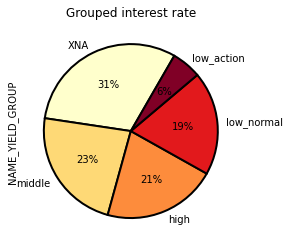

In [250]:
df_1.NAME_YIELD_GROUP.value_counts().plot.pie(autopct = "%1.0f%%",cmap = 'YlOrRd',startangle = 60,wedgeprops={'linewidth':2,'edgecolor':'k'})
plt.title("Grouped interest rate")
plt.show()

### Observation: Most grouped interest rate for previous application are unkonwn

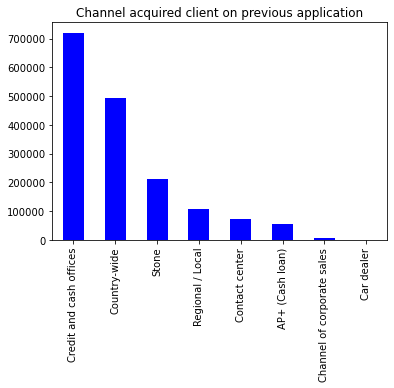

In [251]:
df_1.CHANNEL_TYPE.value_counts().plot.bar(cmap='winter')
plt.title("Channel acquired client on previous application")
plt.show()

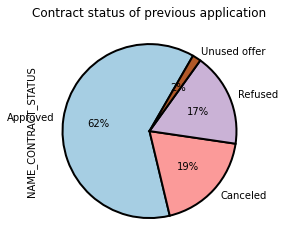

In [252]:
df_1.NAME_CONTRACT_STATUS.value_counts().plot.pie(autopct = "%1.0f%%",cmap = 'Paired',startangle = 60,wedgeprops={'linewidth':2,'edgecolor':'k'})
plt.title("Contract status of previous application")
plt.show()

### Observation: More than 60% loans are in approved state in previos application

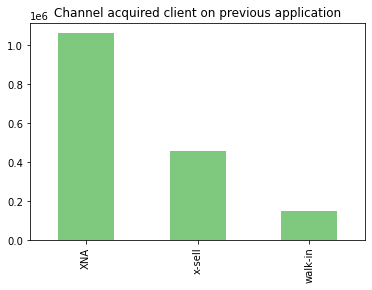

In [253]:
df_1.NAME_PRODUCT_TYPE.value_counts().plot.bar(cmap='Accent')
plt.title("Channel acquired client on previous application")
plt.show()

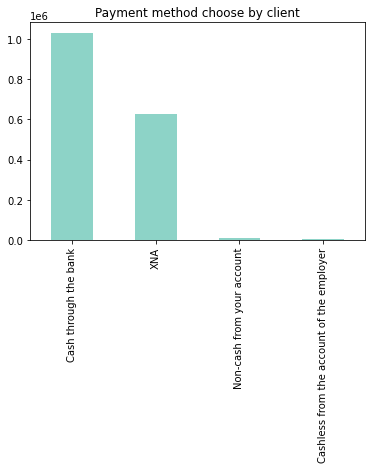

In [254]:
df_1.NAME_PAYMENT_TYPE.value_counts().plot.bar(cmap='Set3')
plt.title("Payment method choose by client")
plt.show()

### Most of client choose repayment method as Cash through the bank

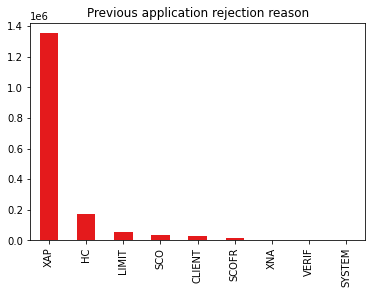

In [255]:
df_1.CODE_REJECT_REASON.value_counts().plot.bar(cmap='Set1')
plt.title("Previous application rejection reason")
plt.show()

### Observation: Most of the client previous application rejection reason is unknown

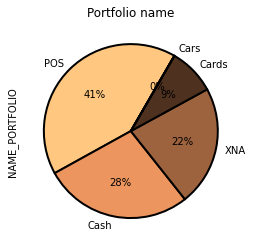

In [256]:
df_1.NAME_PORTFOLIO.value_counts().plot.pie(autopct = "%1.0f%%",cmap = 'copper_r',startangle = 60,wedgeprops={'linewidth':2,'edgecolor':'k'})
plt.title('Portfolio name')
plt.show()

### Observation: 41% client previous application is for POS portfolio

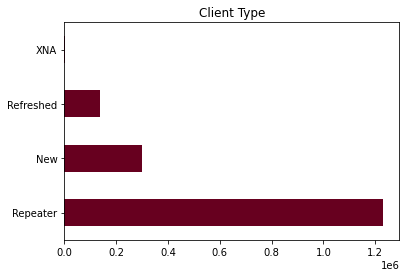

In [257]:
df_1.NAME_CLIENT_TYPE.value_counts().plot.barh(cmap='RdBu')
plt.title('Client Type')
plt.show()

### Observation: Most of the client are repeater

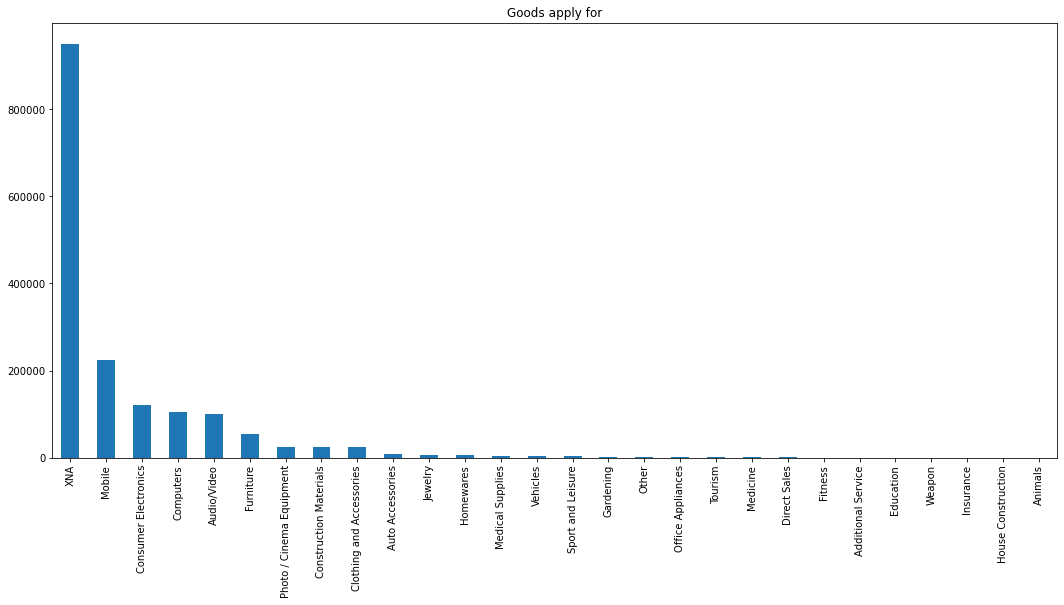

In [258]:
fig = plt.figure(figsize=(18,8))
df_1.NAME_GOODS_CATEGORY.value_counts().plot.bar()
plt.title('Goods apply for')
plt.show()

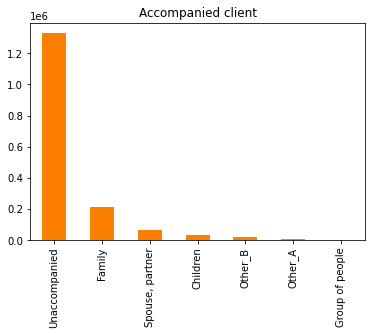

In [259]:
df_1.NAME_TYPE_SUITE.value_counts().plot.bar(cmap='Wistia_r')
plt.title('Accompanied client')
plt.show()

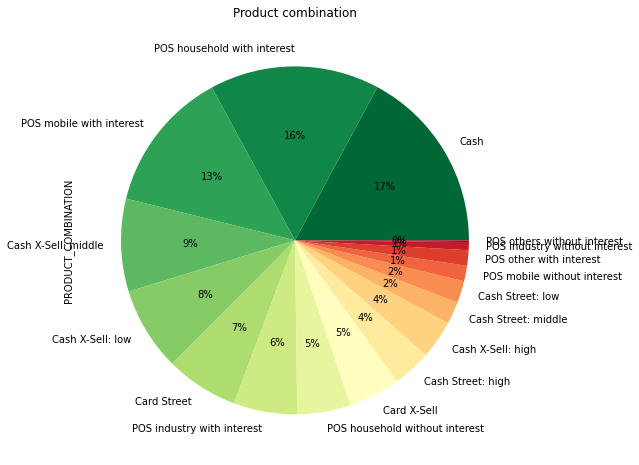

In [260]:
fig = plt.figure(figsize=(18,8))
df_1.PRODUCT_COMBINATION.value_counts().plot.pie(autopct = "%1.0f%%",cmap='RdYlGn_r')
plt.title("Product combination")
plt.show()

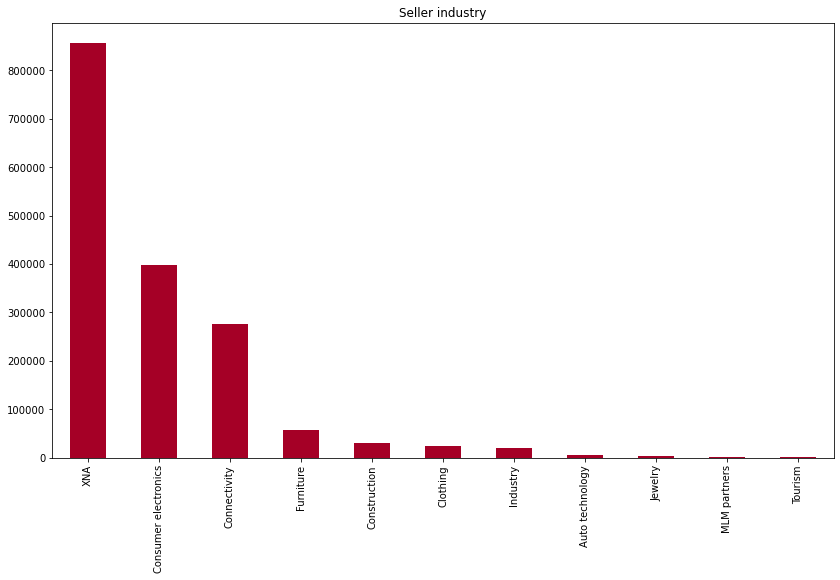

In [261]:
fig = plt.figure(figsize=(14,8))
df_1.NAME_SELLER_INDUSTRY.value_counts().plot.bar(cmap='RdYlGn')
plt.title("Seller industry")
plt.show()

Univariate analysis of numerical variable

SK_ID_PREV


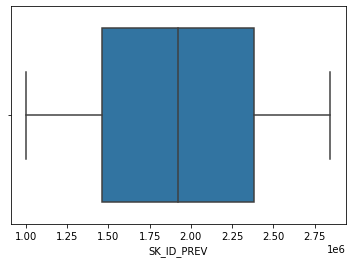

SK_ID_CURR


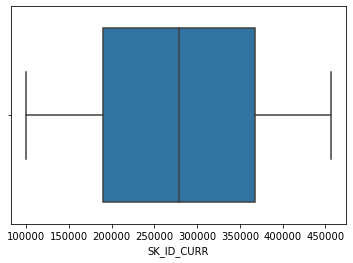

AMT_ANNUITY


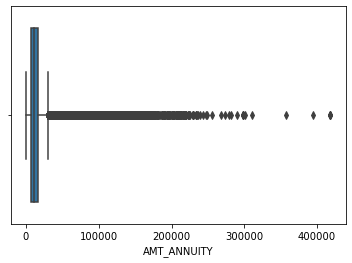

AMT_APPLICATION


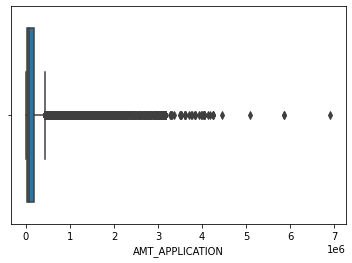

AMT_CREDIT


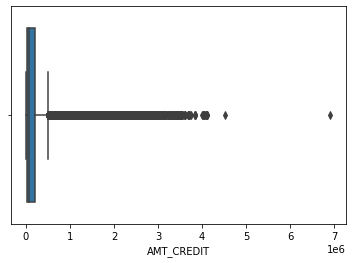

AMT_GOODS_PRICE


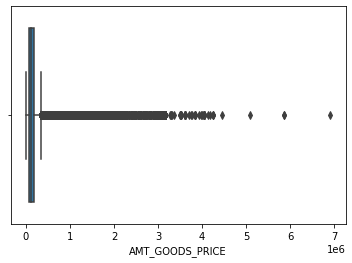

HOUR_APPR_PROCESS_START


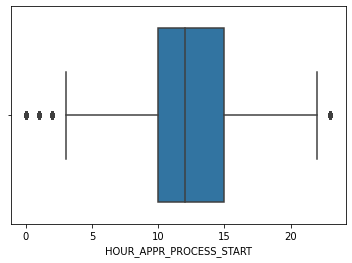

NFLAG_LAST_APPL_IN_DAY


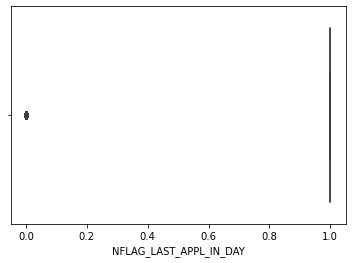

DAYS_DECISION


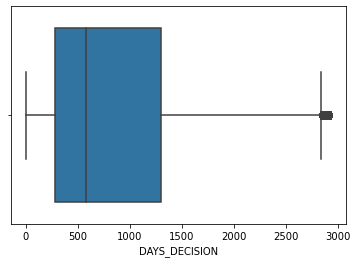

SELLERPLACE_AREA


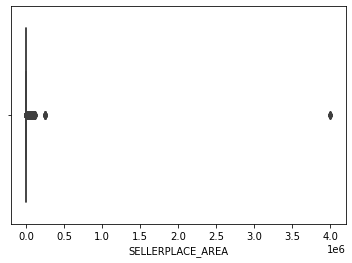

CNT_PAYMENT


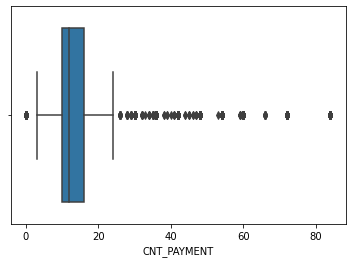

DAYS_FIRST_DRAWING


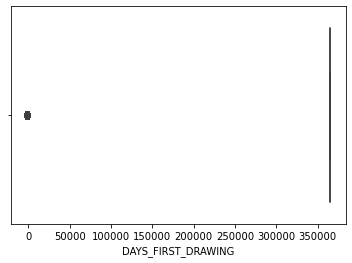

DAYS_FIRST_DUE


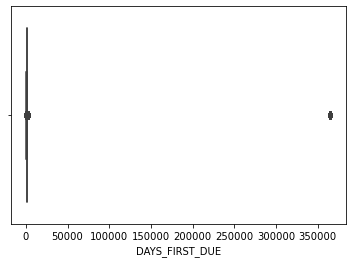

DAYS_LAST_DUE_1ST_VERSION


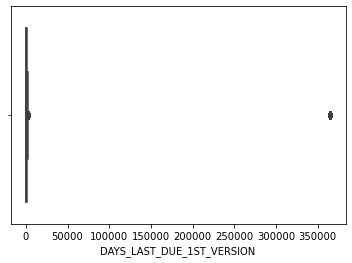

DAYS_LAST_DUE


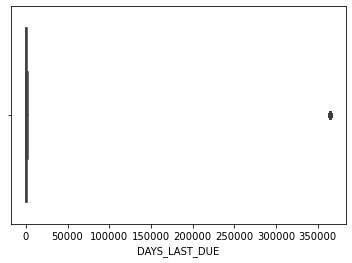

DAYS_TERMINATION


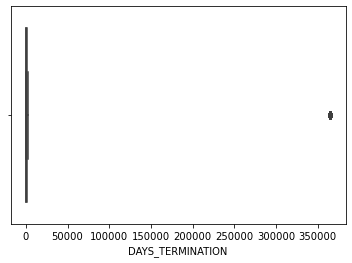

NFLAG_INSURED_ON_APPROVAL


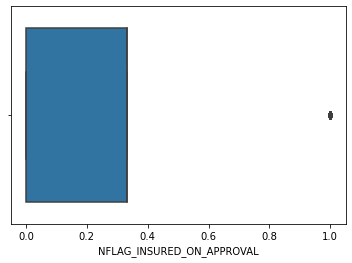

In [262]:
for i in prev_numerical_col:
    print(i)
    sns.boxplot(df_1[i])
    plt.show()

Mergerd application data and previous application data

In [263]:
#merge both the dataframe on SK_ID_CURR with Inner Joins
merged_df = pd.merge(df, df_1, how='inner', on='SK_ID_CURR')
merged_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,AGE_GROUP,YEARS_EMPLOYED,YEARS_EMPLOYED_RANGE,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_y,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,2.025,4.065975,24700.5,3.510,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,1,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,25,20-30,1,0-5,1038818,Consumer loans,9251.775,179055.0,179055.0,179055.0,SATURDAY,9,Y,1,XAP,Approved,606,XNA,XAP,Unaccompanied,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest,365243.0,565.0,125.0,25.0,17.0,0.0
1,100003,0,Cash loans,F,N,N,0,2.700,12.935025,35698.5,11.295,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.510853,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,45,40-50,3,0-5,1810518,Cash loans,98356.995,900000.0,1035882.0,900000.0,FRIDAY,12,Y,1,XNA,Approved,746,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,1,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,716.0,386.0,536.0,527.0,1.0
2,100003,0,Cash loans,F,N,N,0,2.700,12.935025,35698.5,11.295,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.510853,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,45,40-50,3,0-5,2636178,Consumer loans,64567.665,337500.0,348637.5,337500.0,SUNDAY,17,Y,1,XAP,Approved,828,Cash through the bank,XAP,Family,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest,365243.0,797.0,647.0,647.0,639.0,0.0
3,100003,0,Cash loans,F,N,N,0,2.700,12.935025,35698.5,11.295,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.510853

In [264]:
merged_df.shape

(1413701, 109)

In [265]:
merged_df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,YEARS_EMPLOYED,SK_ID_PREV,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,HOUR_APPR_PROCESS_START_y,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1413701.0,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06
mean,2.784813e+05,8.655296e-02,4.048933e-01,1.733160e+00,5.875537e+00,2.701688e+04,5.276522e+00,2.074985e-02,1.632105e+04,7.266347e+04,5.003233e+03,3.034563e+03,1.0,8.064393e-01,1.822585e-01,9.992452e-01,2.828752e-01,7.242904e-02,2.150501e+00,2.059638e+00,2.037603e+00,1.198433e+01,1.207327e-02,4.396686e-02,3.604793e-02,7.360538e-02,2.221481e-01,1.740601e-01,5.114313e-01,4.933175e-01,1.540740e+00,1.537008e-01,1.522906e+00,1.078021e-01,1.084701e+03,7.073632e-05,7.385600e-01,7.639522e-05,1.369597e-02,8.942273e-02,2.129163e-04,7.442521e-02,3.182427e-03,5.588169e-05,1.702623e-03,1.414726e-06,1.783970e-03,1.428874e-03,6.571404e-04,6.006221e-03,1.421800e-04,4.196078e-03,3.989528e-04,3.671215e-04,2.242341e-04,5.484894e-03,6.028149e-03,3.410198e-02,2.664913e-01,3.196935e-01,2.691239e+00,4.421384e+01,1.985500e+02,1.922744e+06,1.484032e+04,1.752436e+05,1.963540e+05,2.006552e+05,1.247893e+01,9.964321e-01,8.803670e+02,3.158884e+02,1.517141e+01,3.513807e+05,9.743652e+03,2.105226e+04,4.739517e+04,5.077479e+04,3.313651e-01
std,1.028118e+05,2.811789e-01,7.173454e-01,1.985734e+00,3.849173e+00,1.395072e+04,3.531028e+00,1.334702e-02,4.344557e+03,1.433374e+05,3.551051e+03,1.507376e+03,0.0,3.950887e-01,3.860576e-01,2.746247e-02,4.503965e-01,2.591971e-01,9.006787e-01,4.957797e-01,4.886431e-01,3.232181e+00,1.092132e-01,2.050215e-01,1.864095e-01,2.611277e-01,4.156903e-01,3.791613e-01,1.909957e-01,1.791145e-01,2.528944e+00,4.654353e-01,2.507192e+00,3.786711e-01,7.999369e+02,8.410194e-03,4.394192e-01,8.740105e-03,1.162256e-01,2

In [266]:
merged_df.drop_duplicates(subset='SK_ID_CURR',inplace=True,keep='last')
merged_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,AGE_GROUP,YEARS_EMPLOYED,YEARS_EMPLOYED_RANGE,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_y,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,2.025,4.065975,24700.5,3.510,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,1,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,25,20-30,1,0-5,1038818,Consumer loans,9251.775,179055.0,179055.0,179055.0,SATURDAY,9,Y,1,XAP,Approved,606,XNA,XAP,Unaccompanied,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest,365243.0,565.0,125.0,25.0,17.0,0.00000
3,100003,0,Cash loans,F,N,N,0,2.700,12.935025,35698.5,11.295,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.510853,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,45,40-50,3,0-5,2396755,Consumer loans,6737.310,68809.5,68053.5,68809.5,SATURDAY,15,Y,1,XAP,Approved,2341,Cash through the bank,XAP,Family,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest,365243.0,2310.0,1980.0,1980.0,1976.0,1.00000
4,100004,0,Revolving loans,M,Y,Y,0,0.675,1.350000,6750.0,1.350,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,1,1,1,1,1,0,Laborers,1,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52,50 above,0,0-5,1564014,Consumer loans,5357.250,24282.0,20106.0,24282.0,FRIDAY,5,Y,1,XAP,Approved,815,Cash through the bank,XAP,Unaccompanied,New,Mobile,POS,XNA,Regional / Local,30,Connectivity,4.0,middle,POS mobile without interest,365243.0,784.0,694.0,724.0,714.0,0.00000
13,100006,0,Cash loans,F,N,Y,0,1.350,3.126825,29686.5,2.970,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House /

In [267]:
target_0 = merged_df[merged_df['TARGET']==0] # Repayers
target_1 = merged_df[merged_df['TARGET']==1] # Defaulters

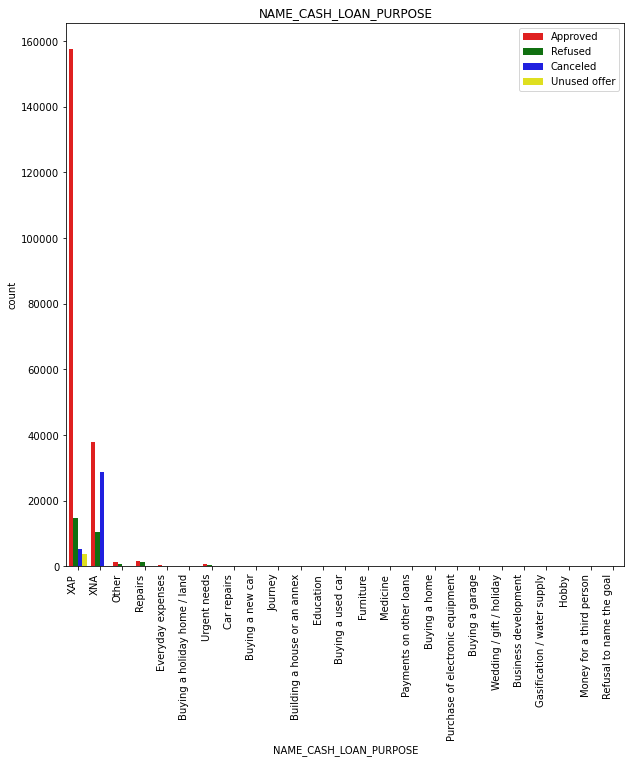

In [268]:
plt.figure(figsize=(10,10))
sns.countplot(x='NAME_CASH_LOAN_PURPOSE', data=target_0, hue= 'NAME_CONTRACT_STATUS',palette= ["red","green","blue","yellow"])

plt.title('NAME_CASH_LOAN_PURPOSE') 
plt.legend(loc = "upper right")
plt.xticks(rotation=90, ha='right')

plt.show()

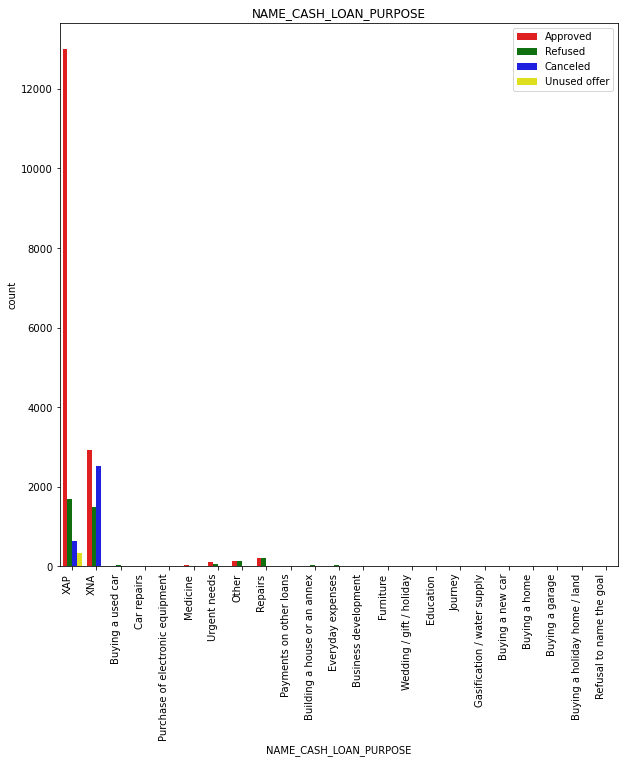

In [269]:
plt.figure(figsize=(10,10))
sns.countplot(x='NAME_CASH_LOAN_PURPOSE', data=target_1, hue= 'NAME_CONTRACT_STATUS',palette= ["red","green","blue","yellow"])

plt.title('NAME_CASH_LOAN_PURPOSE') 
plt.legend(loc = "upper right")
plt.xticks(rotation=90, ha='right')

plt.show()

### Observations:
Loan purpose has high number of unknown values (XAP, XNA)
Loan taken for the Repairs have highest default rate
A very high number application have been approved by bank or refused by client which has purpose as "Repairs".

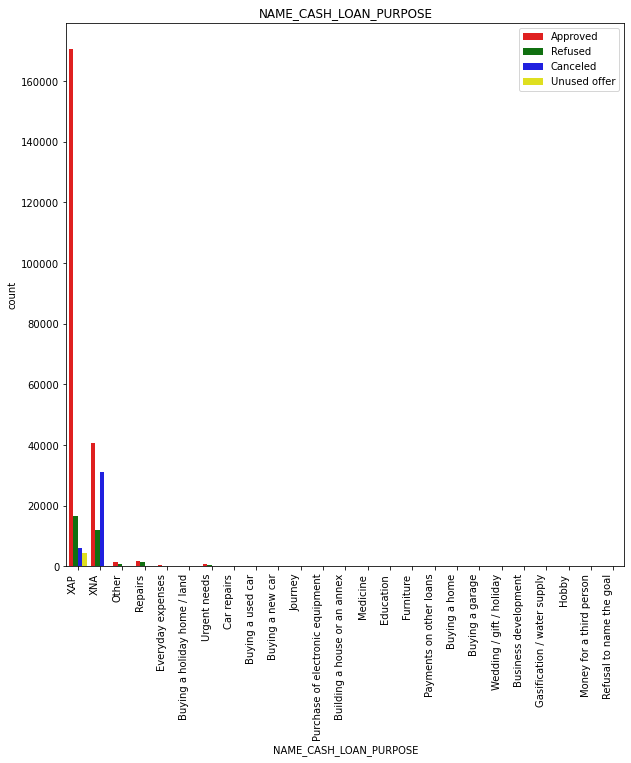

In [270]:
plt.figure(figsize=(10,10))
sns.countplot(x='NAME_CASH_LOAN_PURPOSE', data=merged_df, hue= 'NAME_CONTRACT_STATUS',palette= ["red","green","blue","yellow"])

plt.title('NAME_CASH_LOAN_PURPOSE') 
plt.legend(loc = "upper right")
plt.xticks(rotation=90, ha='right')

plt.show()

In [271]:
merged_corrmat = merged_df.corr()
merged_corrdf = merged_corrmat.where(np.triu(np.ones(merged_corrmat.shape), k=1).astype(np.bool))
merged_corrdf = merged_corrdf.unstack().reset_index()
merged_corrdf.columns = ['Column1', 'Column2', 'Correlation']
merged_corrdf.dropna(subset = ['Correlation'], inplace = True)
merged_corrdf.sort_values(by = 'Correlation', ascending = False).head(10)

,Column1,Column2,Correlation
4907,YEARS_EMPLOYED,DAYS_EMPLOYED,1.000000
4827,AGE,DAYS_BIRTH,0.999710
2558,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.998503
5358,AMT_GOODS_PRICE_y,AMT_APPLICATION,0.986814
478,AMT_GOODS_PRICE_x,AMT_CREDIT_x,0.986397
5279,AMT_CREDIT_y,AMT_APPLICATION,0.971016
5359,AMT_GOODS_PRICE_y,AMT_CREDIT_y,0.969306
1599,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.950084
6159,DAYS_TERMINATION,DAYS_LAST_DUE,0.934926
1424,CNT_FAM_MEMBERS,CNT_CHILDREN,0.880587


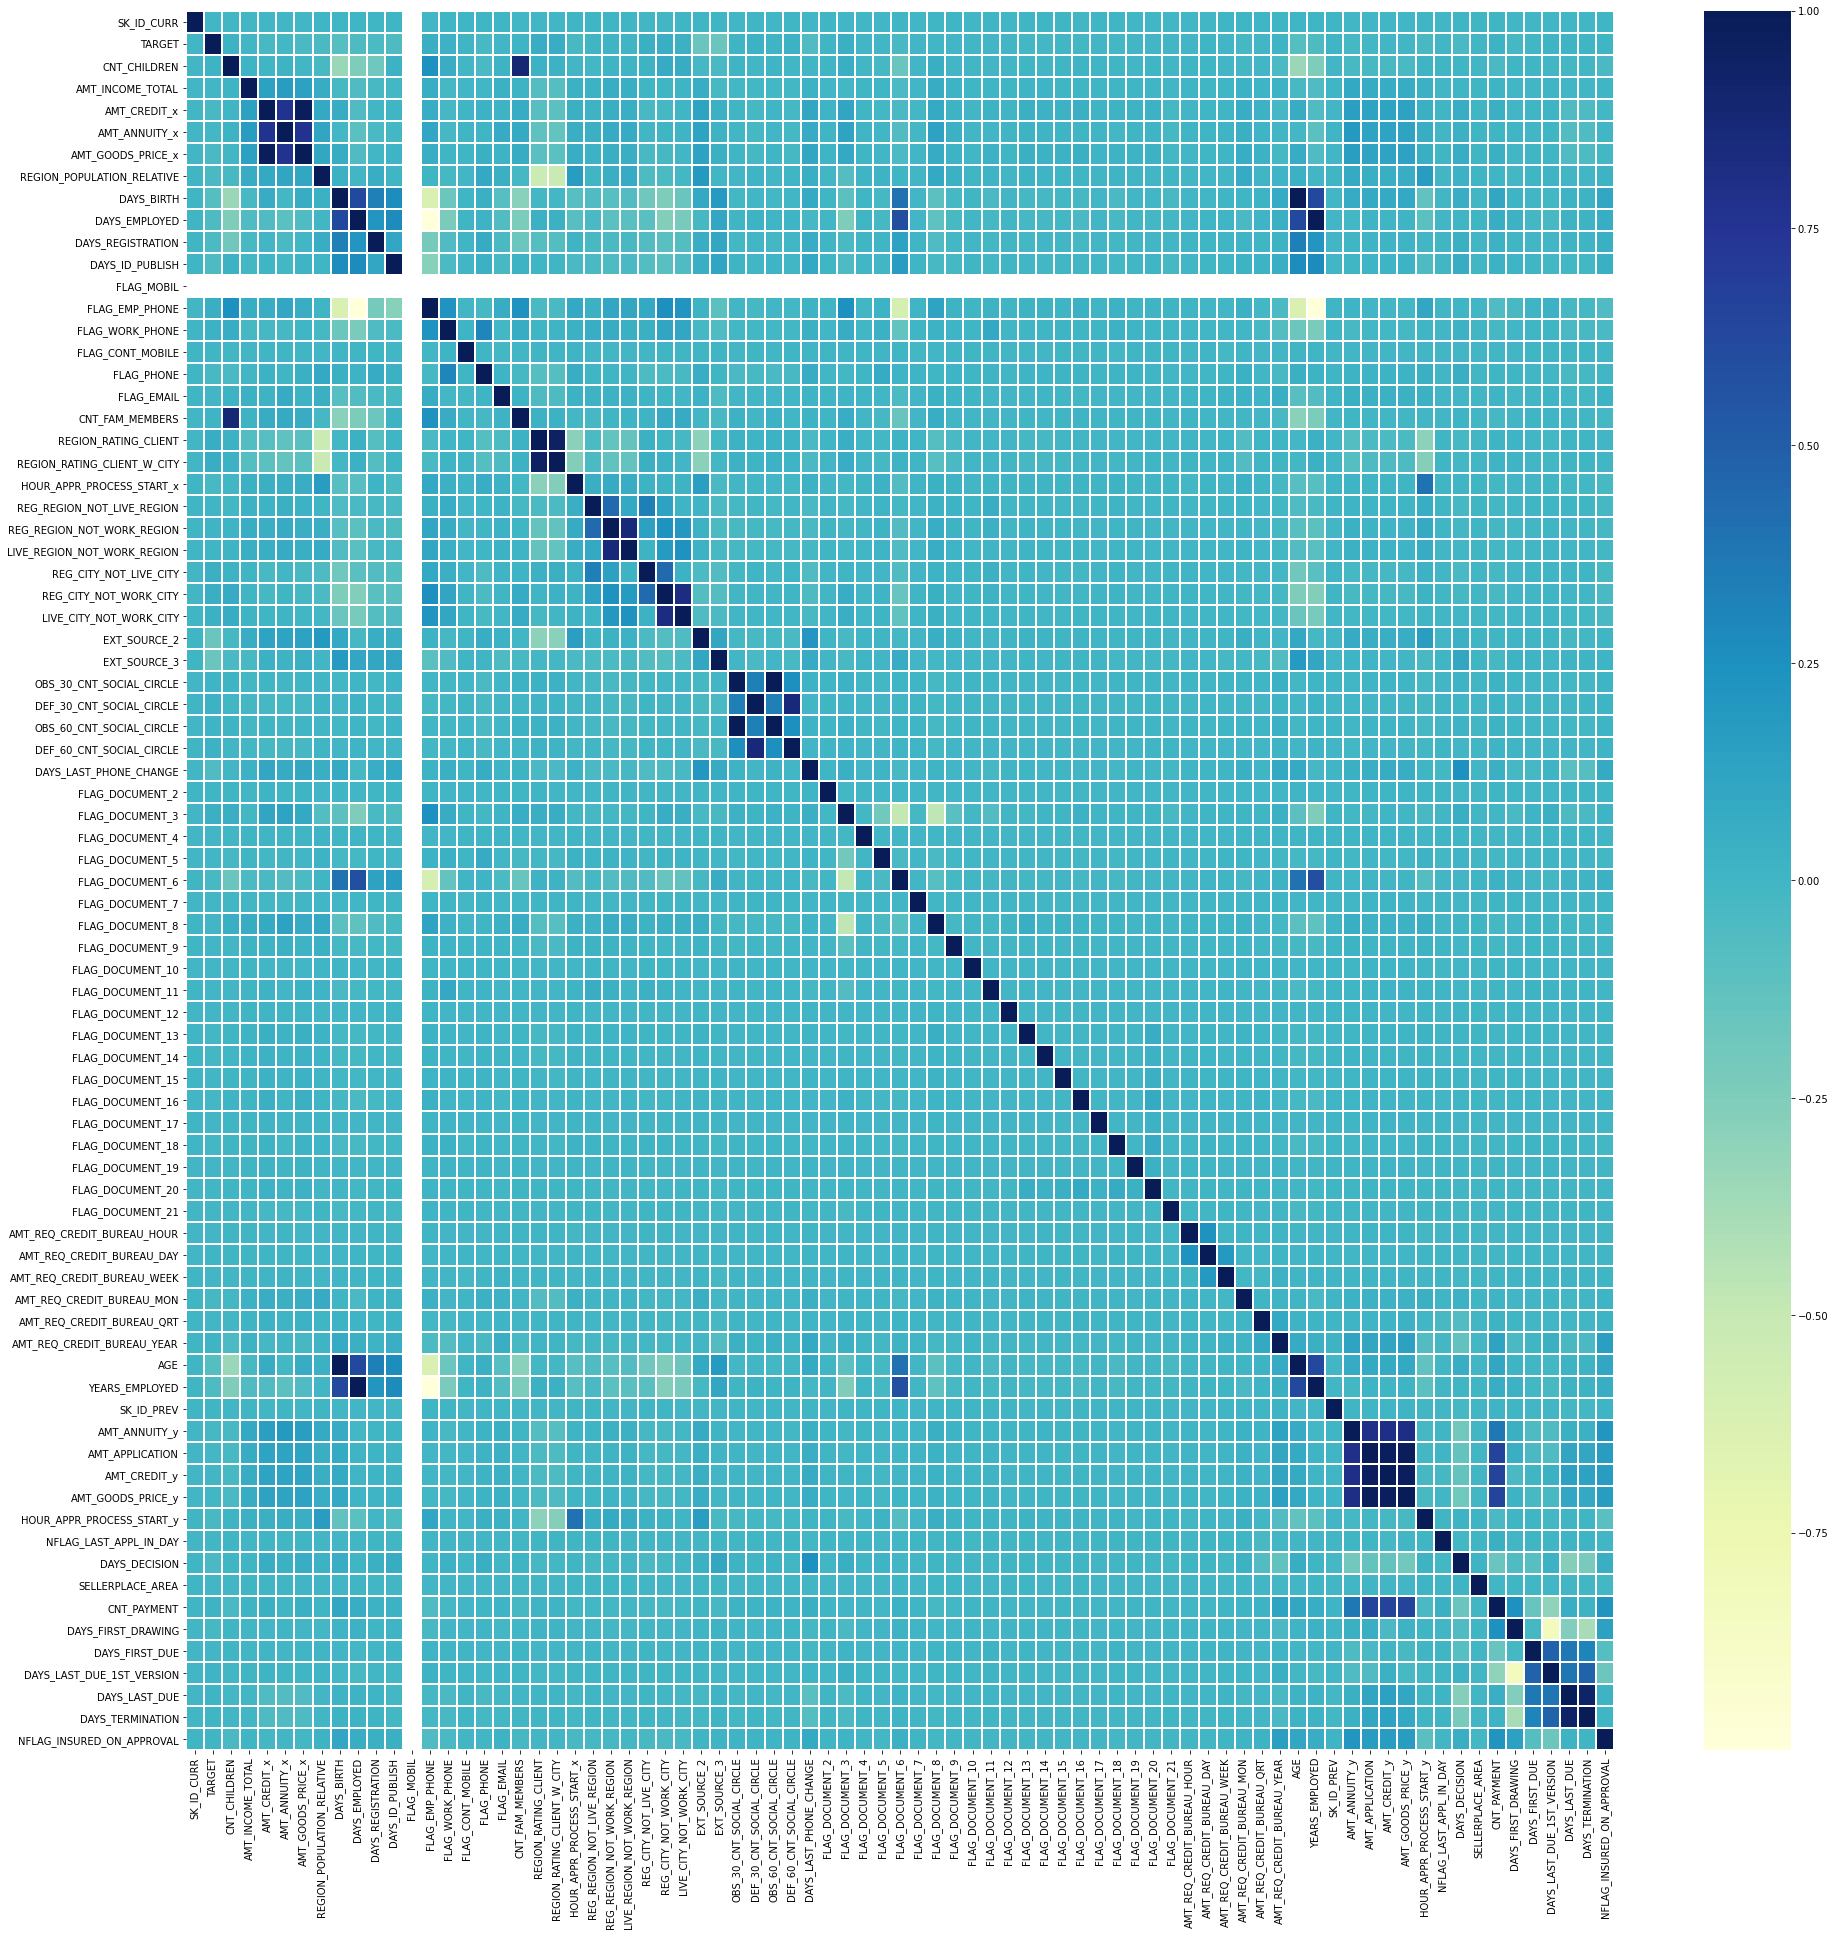

In [272]:
fig = plt.figure(figsize=(32,32))
ax = sns.heatmap(merged_corrmat, cmap="YlGnBu",annot=False,linewidth =1)

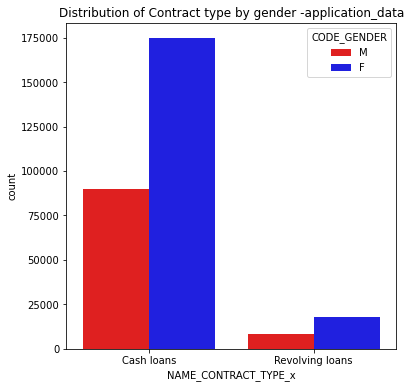

In [273]:
fig  = plt.figure(figsize=(13,6))
plt.subplot(121)
sns.countplot("NAME_CONTRACT_TYPE_x",hue="CODE_GENDER",data=merged_df,palette=["r","b","g"])
plt.title("Distribution of Contract type by gender -application_data")
plt.show()

### Observation: 
1) Female are taking more loans as compare to Male
2) Cash loans is always preferred over Revolving loans by both genders

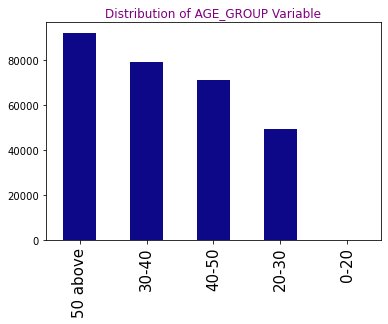

In [274]:
merged_df.AGE_GROUP.value_counts().plot.bar(cmap='plasma')
title = "Distribution of AGE_GROUP Variable"
plt.title(title,color="purple")
plt.xticks(size=15,color='Black')
plt.show()

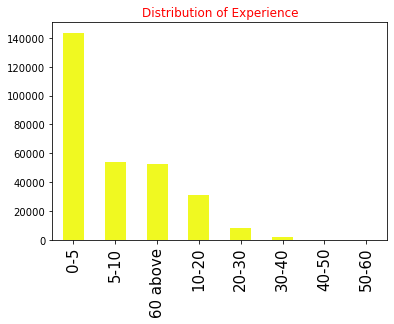

In [275]:
merged_df.YEARS_EMPLOYED_RANGE.value_counts().plot.bar(cmap='plasma_r')
title = "Distribution of Experience"
plt.title(title,color="red")
plt.xticks(size=15,color='Black')
plt.show()

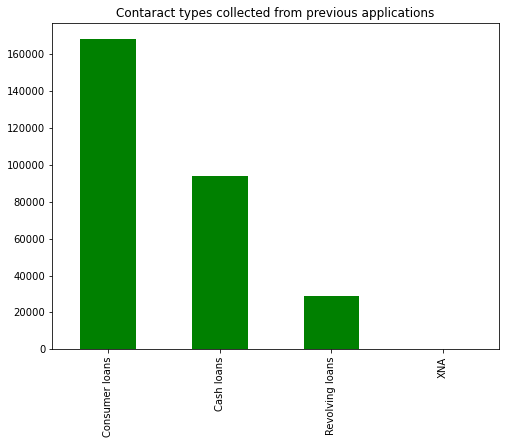

In [276]:
plt.figure(figsize=(8,6))
merged_df.NAME_CONTRACT_TYPE_y.value_counts().plot.bar(cmap='ocean')
plt.title("Contaract types collected from previous applications")
plt.show()

### Observation: Consumer loan applications are maximum followed by cash loan applications in previous loan.

Text(0.5, 1.0, 'popular goods for applying loans')

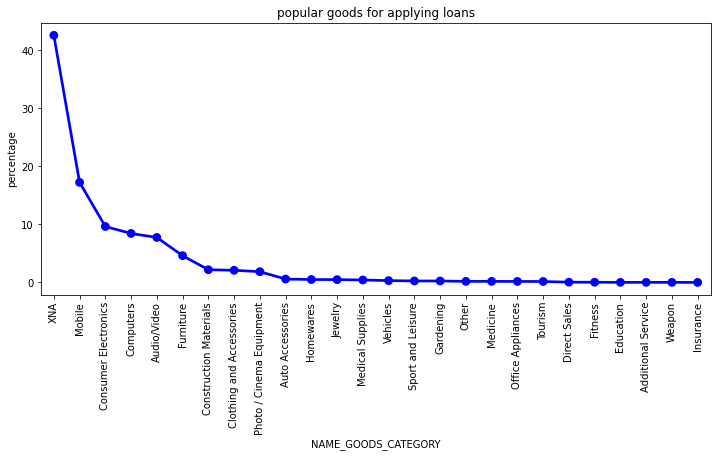

In [277]:
goods = merged_df["NAME_GOODS_CATEGORY"].value_counts().reset_index()
goods["percentage"] = round(goods["NAME_GOODS_CATEGORY"]*100/goods["NAME_GOODS_CATEGORY"].sum(),2)
fig = plt.figure(figsize=(12,5))
sns.pointplot("index","percentage",data=goods,color="blue")
plt.xticks(rotation = 90)
plt.xlabel("NAME_GOODS_CATEGORY")
plt.ylabel("percentage")
plt.title("popular goods for applying loans")

### Observation: XNA ,Mobile,Computers and consumer electronics are popular goods for applying loans


## Conclusion:

### After analysing data set below are few points which bank must consider while approving loan:

#### Repayer

##### CODE_GENDER: Female are most likely to repay loan
##### AMT_INCOME_TOTAL:Applicants with Income in range of 100k-200k are less likely to default
##### CNT_CHILDREN: Applicants with zero to two children are most likely to repay loan.
#### DAYS_BIRTH: Applicants above 50 having low probability of defaulting.
##### DAYS_EMPLOYED: Applicants with 40+ year experience having around 1% default rate
##### NAME_EDUCATION_TYPE: Applicant having Academic degree has rate of reapying loan.
###### NAME_INCOME_TYPE: Businessmen have no defaulters.

#### Defaulter

##### AMT_GOODS_PRICE: When the credit amount goes beyond 2M, there is an increase in defaulters.
##### CODE_GENDER: Male applicants have high default rate
##### CNT_FAM_MEMBERS: Applicants who have higher family members (>=11) have higher default rate and their applications can be rejected.
##### DAYS_EMPLOYED: Applicants who have less than 5 years of employment have high default rate.
##### NAME_EDUCATION_TYPE: Applicants with Lower Secondary, Secondary education and incomplete higher education have higher default rate
##### NAME_FAMILY_STATUS : Single applicants have higher default rate
##### OCCUPATION_TYPE: Applicants who are Low-skill Laborers, Drivers and Waiters/barmen staff, Security staff, Laborers and Cooking staff as the default rate is huge.
##### AGE_GROUP: 30-40 age group people defaulter rate is more.

#### General Observation

##### Popular goods for applying loan are mobile, consumer electronics and computer.
##### Most of applicats apply for consumer loans.
##### Ratio of female applying for loan is higher
##### Higher number of applicants are of repeater.